In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")
    sys.path.append(module_path+"\\References")

import data_manipulation as dm 
import data_visualization as dv 
import data_dictionary as dd
import data_preprocessing as dp

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_rows', 120)

In [4]:
file_name = 'cleaned_data'
data = dm.read_data(file_name, header = 0)
data.head()

Unnamed: 0  Year of project  Organization type  Role in organization  \
0           0             2015                  1                     1   
1           1             2016                  5                     1   
2           2             2008                  5                     3   
3           3             2009                  4                     2   
4           4             2016                  4                     2   

   Size of organization  Size of IT department  Customer organization type  \
0                    16                      7                          13   
1                     2                      1                           2   
2                     2                      2                           3   
3                     3                      2                           4   
4                     3                      2                           4   

   Estimated duration  Actual duration  Development type  Application domain  \
0                 2.0              3.0                 1                   7   
1                 2.0              3.0                 1                   3   
2                 3.0              5.0                 1                   3   
3                 6.0              6.0                 1                   7   
4                12.0             24.0                 1                   7   

   Object points  Other sizing method  Estimated effort  Actual effort  \
0          100.0                    2              2112         3168.0   
1           19.0                    2              1056         1584.0   
2           64.0                    3              3168         5280.0   
3          246.0                    5              5280         5280.0   
4          420.0                    5             19008        38016.0   

   Contract maturity  Government policy impact  Economic instability impact  \
0                  8                       4.0                            1   
1                  4                       4.0                            3   
2                  4                       5.0                            2   
3                  2                       4.0                            1   
4                  3                       4.0                            3   

   Organization management structure clarity  Developer hiring policy  \
0                                        2.0                      1.0   
1                                        1.0                      2.0   
2                                        3.0                      4.0   
3                                        1.0                      1.0   
4                                        1.0                      2.0   

   Developer incentives policy  Developer training  \
0                          8.0                 3.0   
1                          6.0                 3.0   
2                          6.0                 3.0   
3                          4.0                 3.0   
4                          3.0                 3.0   

   Development team management  Top management support  \
0                          4.0                       4   
1                          7.0                       4   
2                          6.0                       1   
3                          6.0                       4   
4                          2.0                       4   

   Top management opinion of previous system  Clarity of manual system  \
0                                          1                       2.0   
1                                          1                       4.0   
2                                          0                       6.0   
3                                          1                       3.0   
4                                          1                       3.0   

   User resistance  User computer experience  Users stability  \
0             1.75                         2         1.8888

In [5]:
df = data.copy()

In [6]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
df.shape

(120, 70)

# Missing values Map

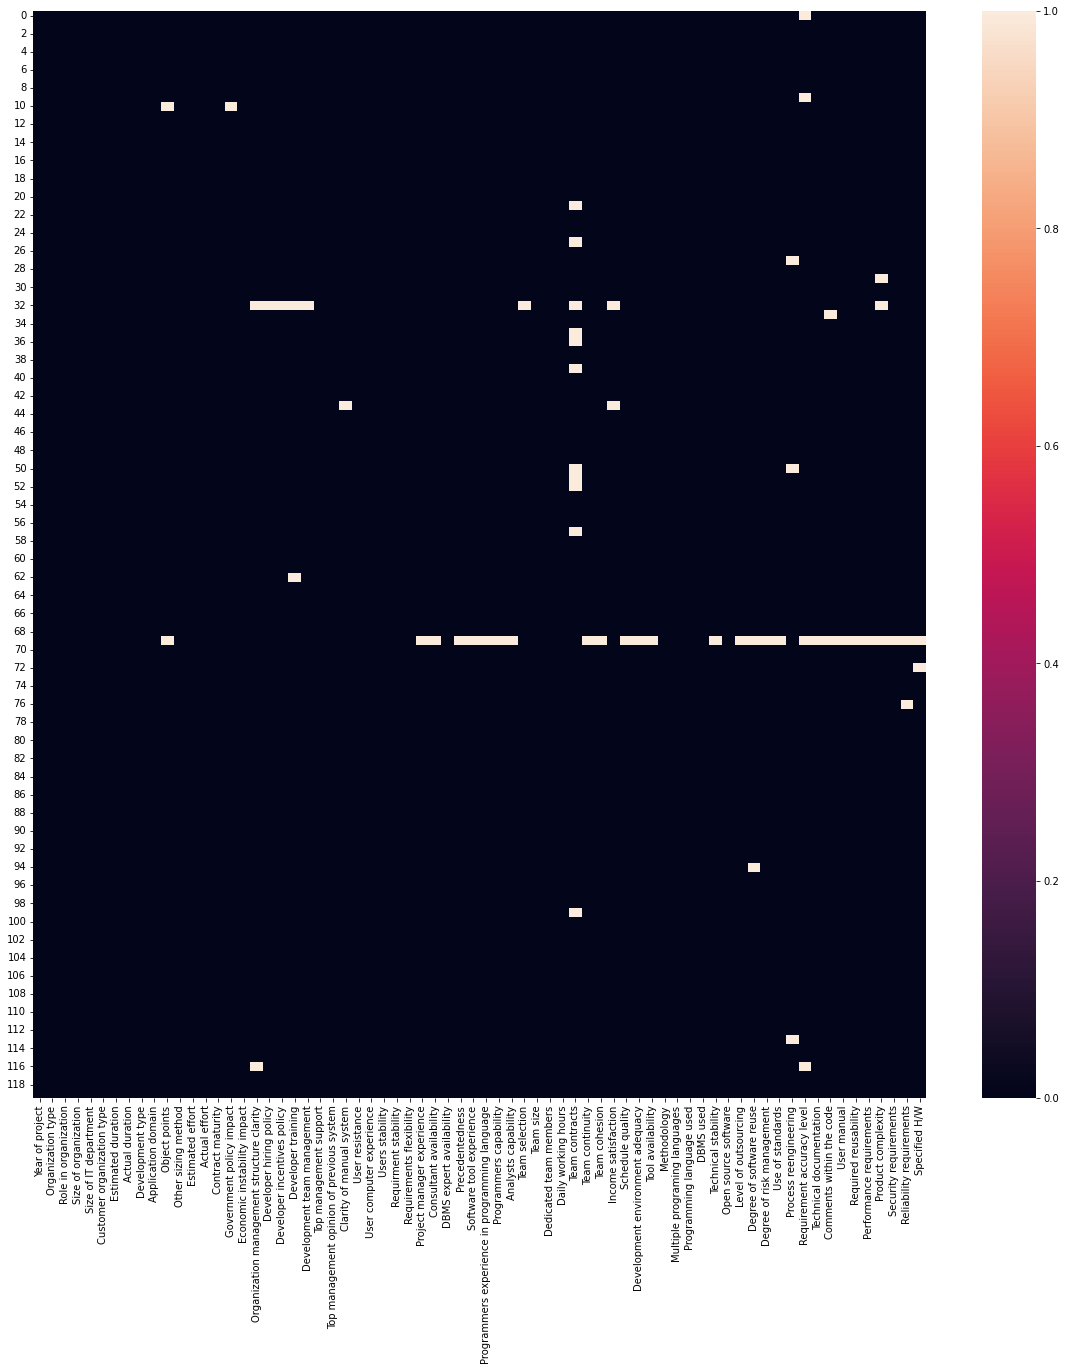

In [8]:
dv.missing_values_map(df)

# Numerical Columns Visualization

In [9]:
numerical_columns = list(set(df.columns) - set(dd.categorical_cols_names()))
numerical_columns.sort()
len(numerical_columns)

35

In [10]:
df[numerical_columns].describe()

Actual duration  Actual effort  Analysts capability  \
count       120.000000     120.000000           119.000000   
mean         10.375000    9060.929167             1.731092   
std           8.903604   12598.482007             0.945081   
min           0.500000     396.000000             1.000000   
25%           5.000000    2112.000000             1.000000   
50%           8.000000    4576.000000             1.000000   
75%          12.000000   10032.000000             2.000000   
max          48.000000   79200.000000             4.000000   

       Clarity of manual system  Contract maturity  Daily working hours  \
count                119.000000         120.000000           120.000000   
mean                   4.277311           4.341667             8.258333   
std                    1.395661           1.621784             1.600923   
min                    2.000000           1.000000             4.000000   
25%                    3.000000           3.000000             8.000000   
50%                    4.000000           4.000000             8.000000   
75%                    6.000000           5.000000             8.000000   
max                    8.000000           8.000000            14.000000   

       Dedicated team members  Degree of risk management  \
count              120.000000                 119.000000   
mean                 4.266667                   2.436975   
std                  6.446592                   0.829934   
min                  0.000000                   1.000000   
25%                  1.000000                   2.000000   
50%                  3.000000                   3.000000   
75%                  5.000000                   3.000000   
max                 48.000000                   3.000000   

       Developer incentives policy  Development environment adequacy  \
count                   119.000000                        119.000000   
mean                      5.655462                          1.226891   
std                       1.617892                          0.573969   
min                       2.000000                          1.000000   
25%                       4.000000                          1.000000   
50%                       6.000000                          1.000000   
75%                       7.000000                          1.000000   
max                       8.000000                          4.000000   

       Development team management  Economic instability impact  \
count                   119.000000                   120.000000   
mean                      4.109244                     1.958333   
std                       2.090292                     1.252868   
min                       2.000000                     1.000000   
25%                       2.500000                     1.000000   
50%                       3.000000                     1.000000   
75%                       5.000000                     3.000000   
max                      11.000000                     7.000000   

       Estimated duration  Estimated effort  Multiple programing languages  \
count          120.000000        120.000000                     120.000000   
mean             5.670833       5225.183333                       1.191667   
std              3.685793       6881.106926                       0.472715   
min              0.250000        176.000000                       1.000000   
25%              3.000000       1278.750000                       1.000000   
50%              5.000000       2860.000000                       1.000000   
75%              7.000000       6336.000000                       1.000000   
max             20.000000      50688.000000                       3.000000   

       Object points  Other sizing method  Performance requirements  \
count     118.000000           120.000000                119.000000   
mean      203.474576             2.241667                  1.638655   
std       250.811357             0.819877                  0.9

## Correlations

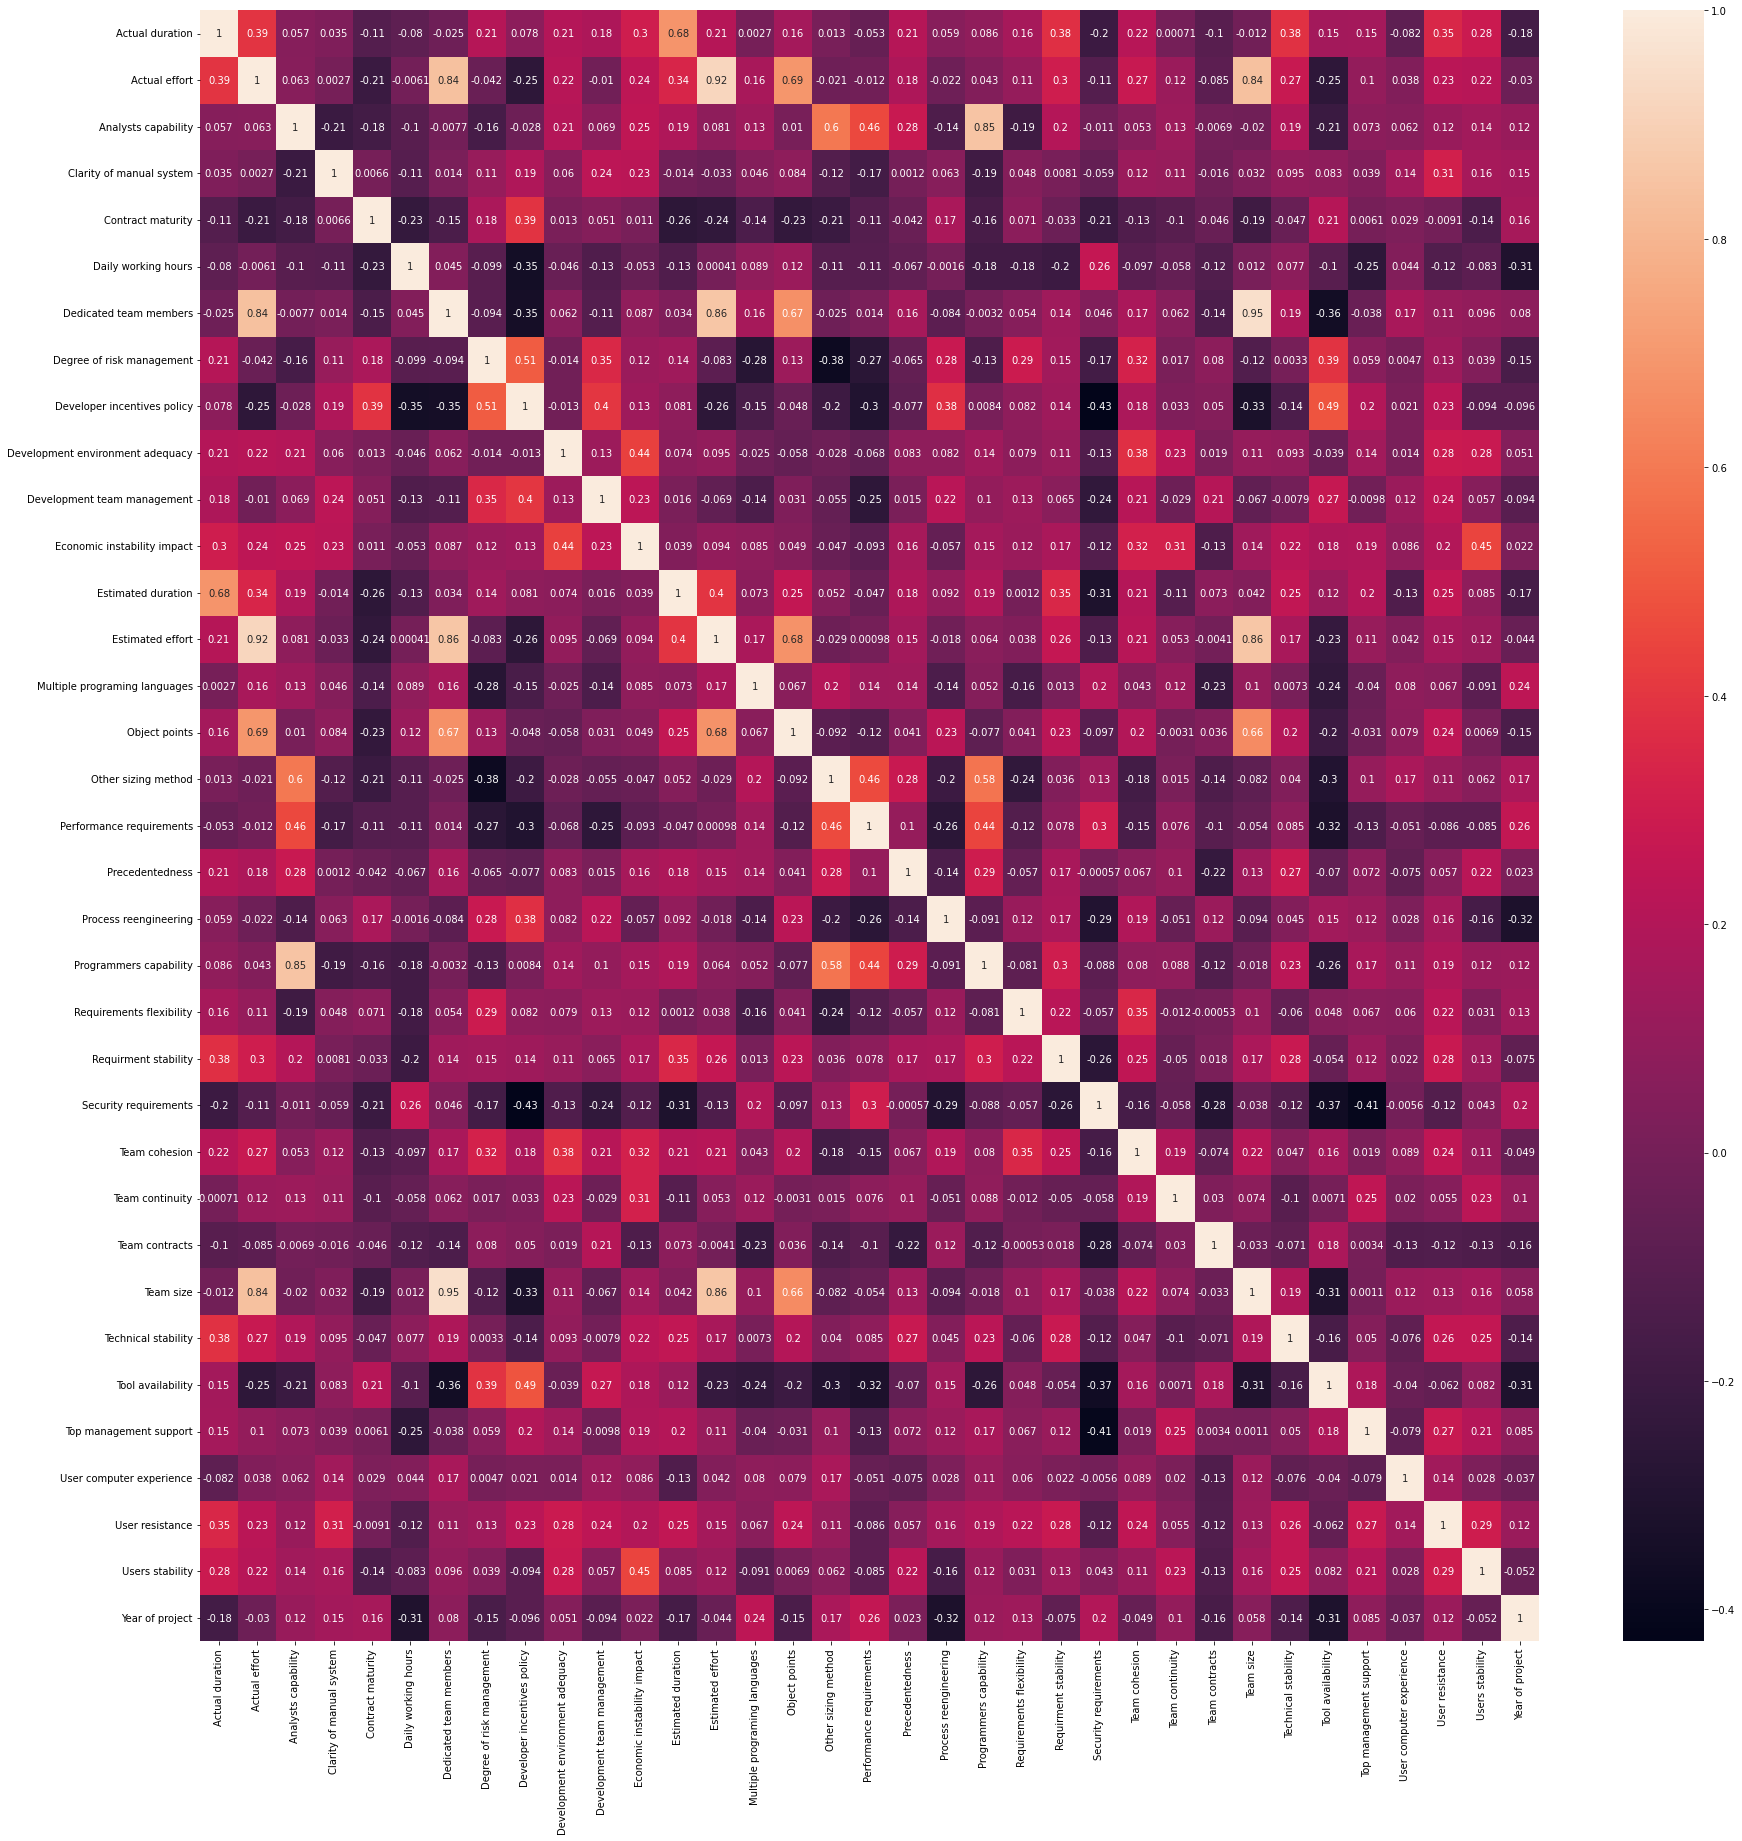

In [11]:
dv.corr_matrix(df[numerical_columns])

#### High correlations

1. ``Actual duration: Estimated duration (0.68)``
2. ``Actual effort: Estimated effort (0.92), Dedicated team members (0.84), Object points (0.69), Team size (0.84)``
3. ``Analysts capability: Programmers capability (0.85)``
4. ``Dedicated team member: Team size (0.95), Estimated effort (0.86)``
5. ``Estimated effort: Object points (0.68), Team size (0.86)``

## Date analysis

<AxesSubplot:>

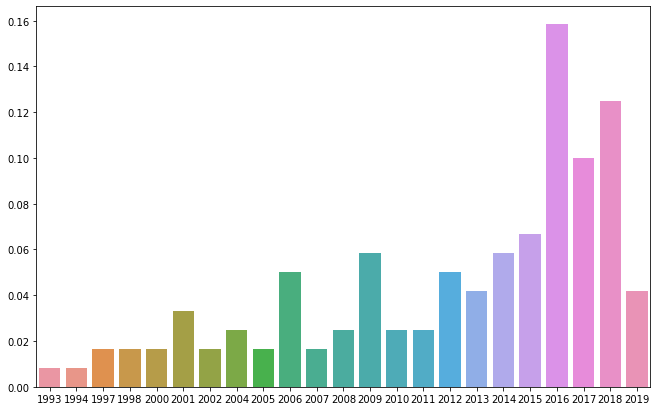

In [12]:
plt.figure(figsize = (11, 7))
counts = df['Year of project'].value_counts(normalize = True, sort = False)
sns.barplot(x = counts.index, y = counts.values)

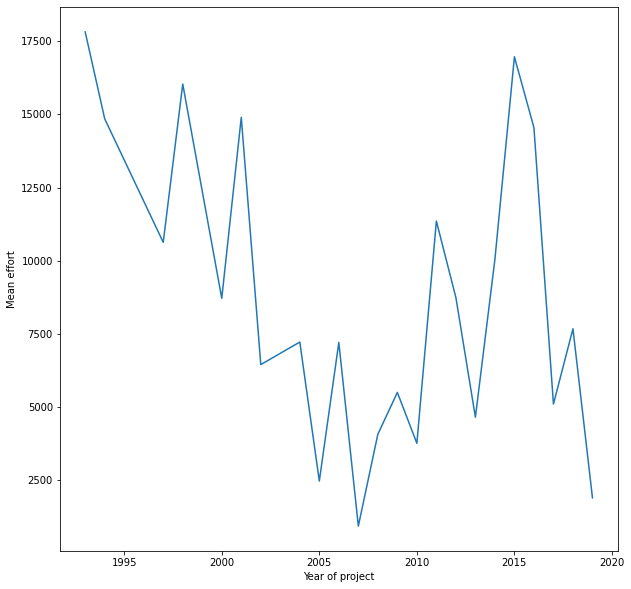

In [13]:
mean_effort_per_year = df['Actual effort'].groupby(df['Year of project']).mean()
plt.figure(figsize = (10, 10))
plt.plot(mean_effort_per_year)
plt.xlabel('Year of project')
plt.ylabel('Mean effort')
plt.show()

``Years do not impact effort``

## Histograms

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

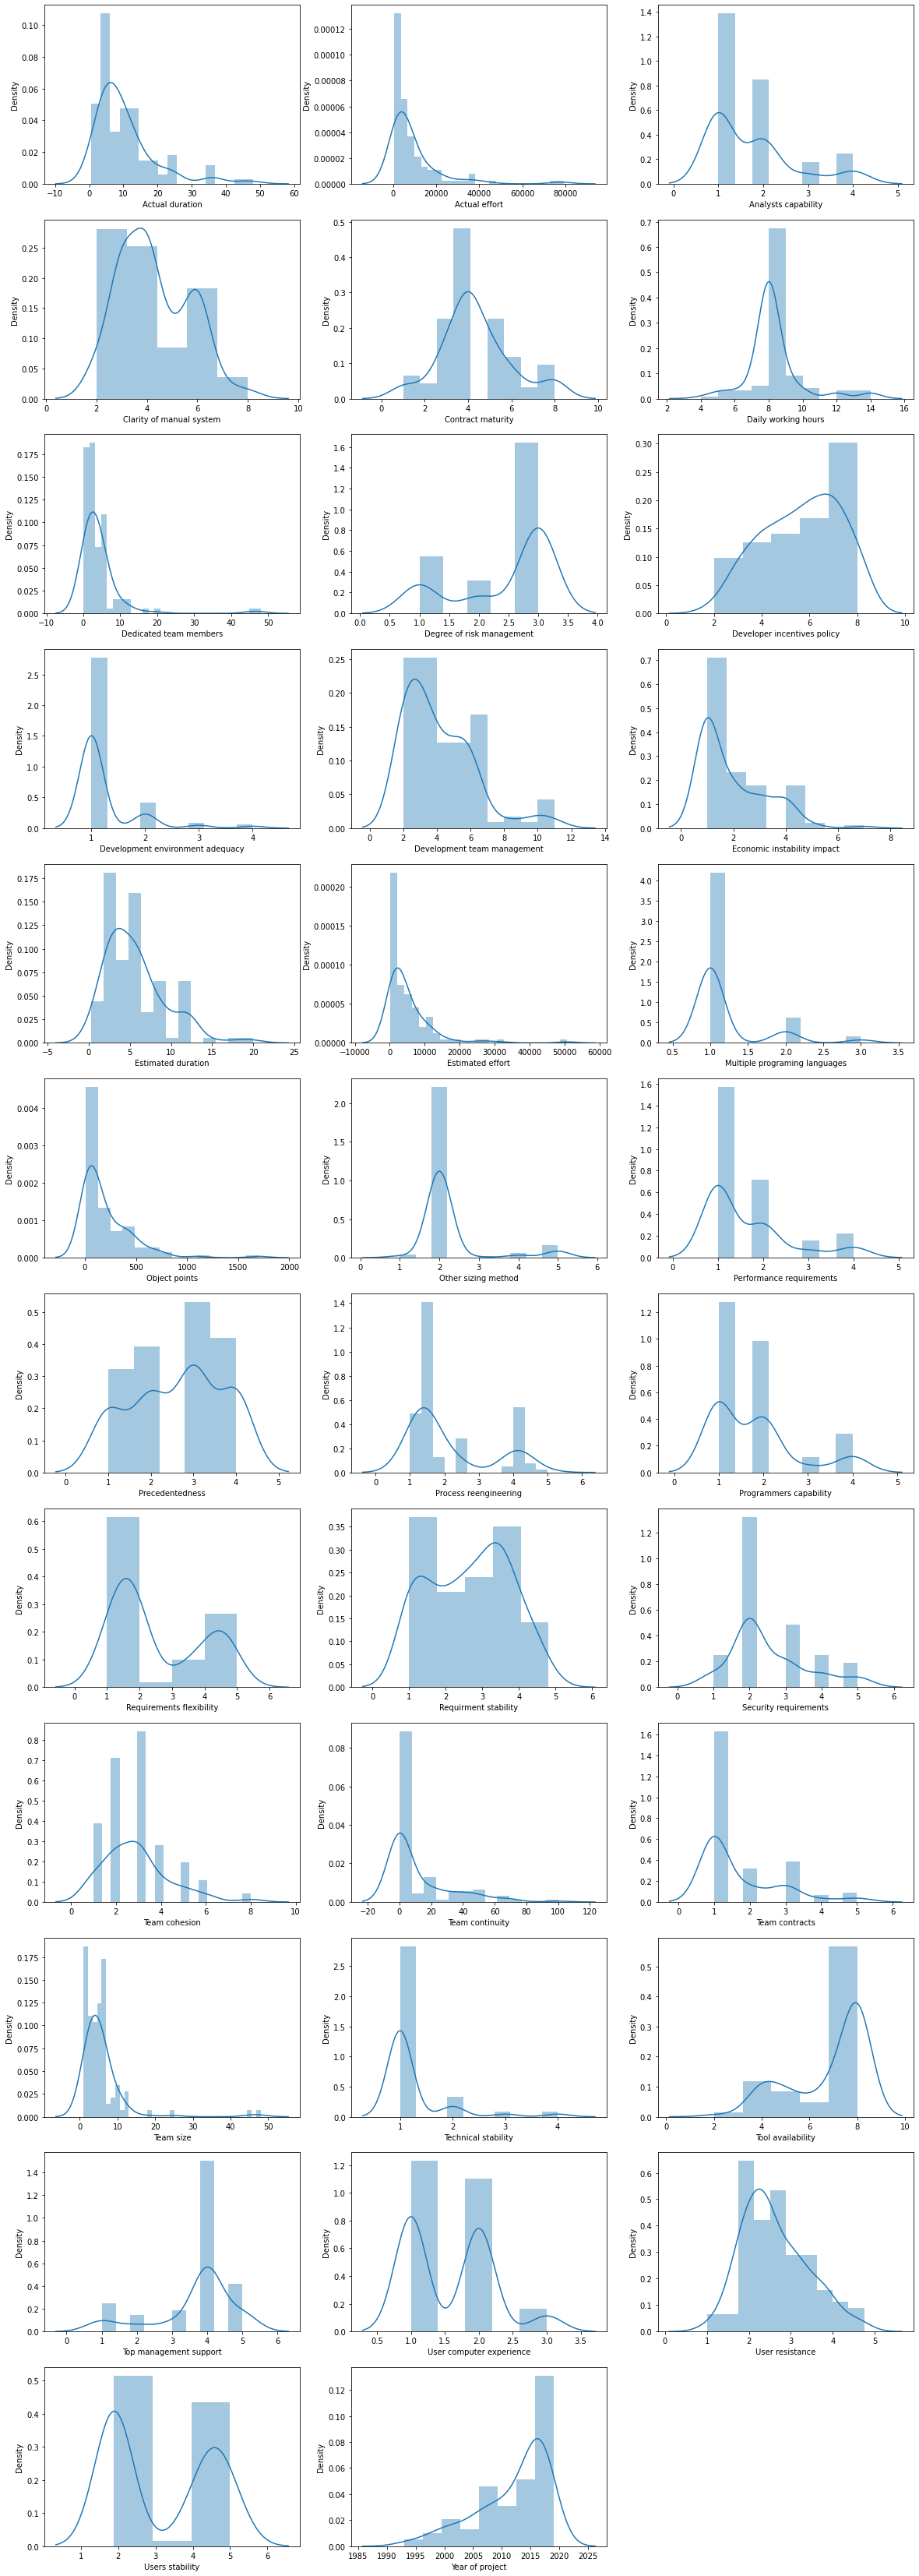

In [14]:
dv.numerical_cols_histogram(numerical_columns, df)

## Actual effort and Numerical columns

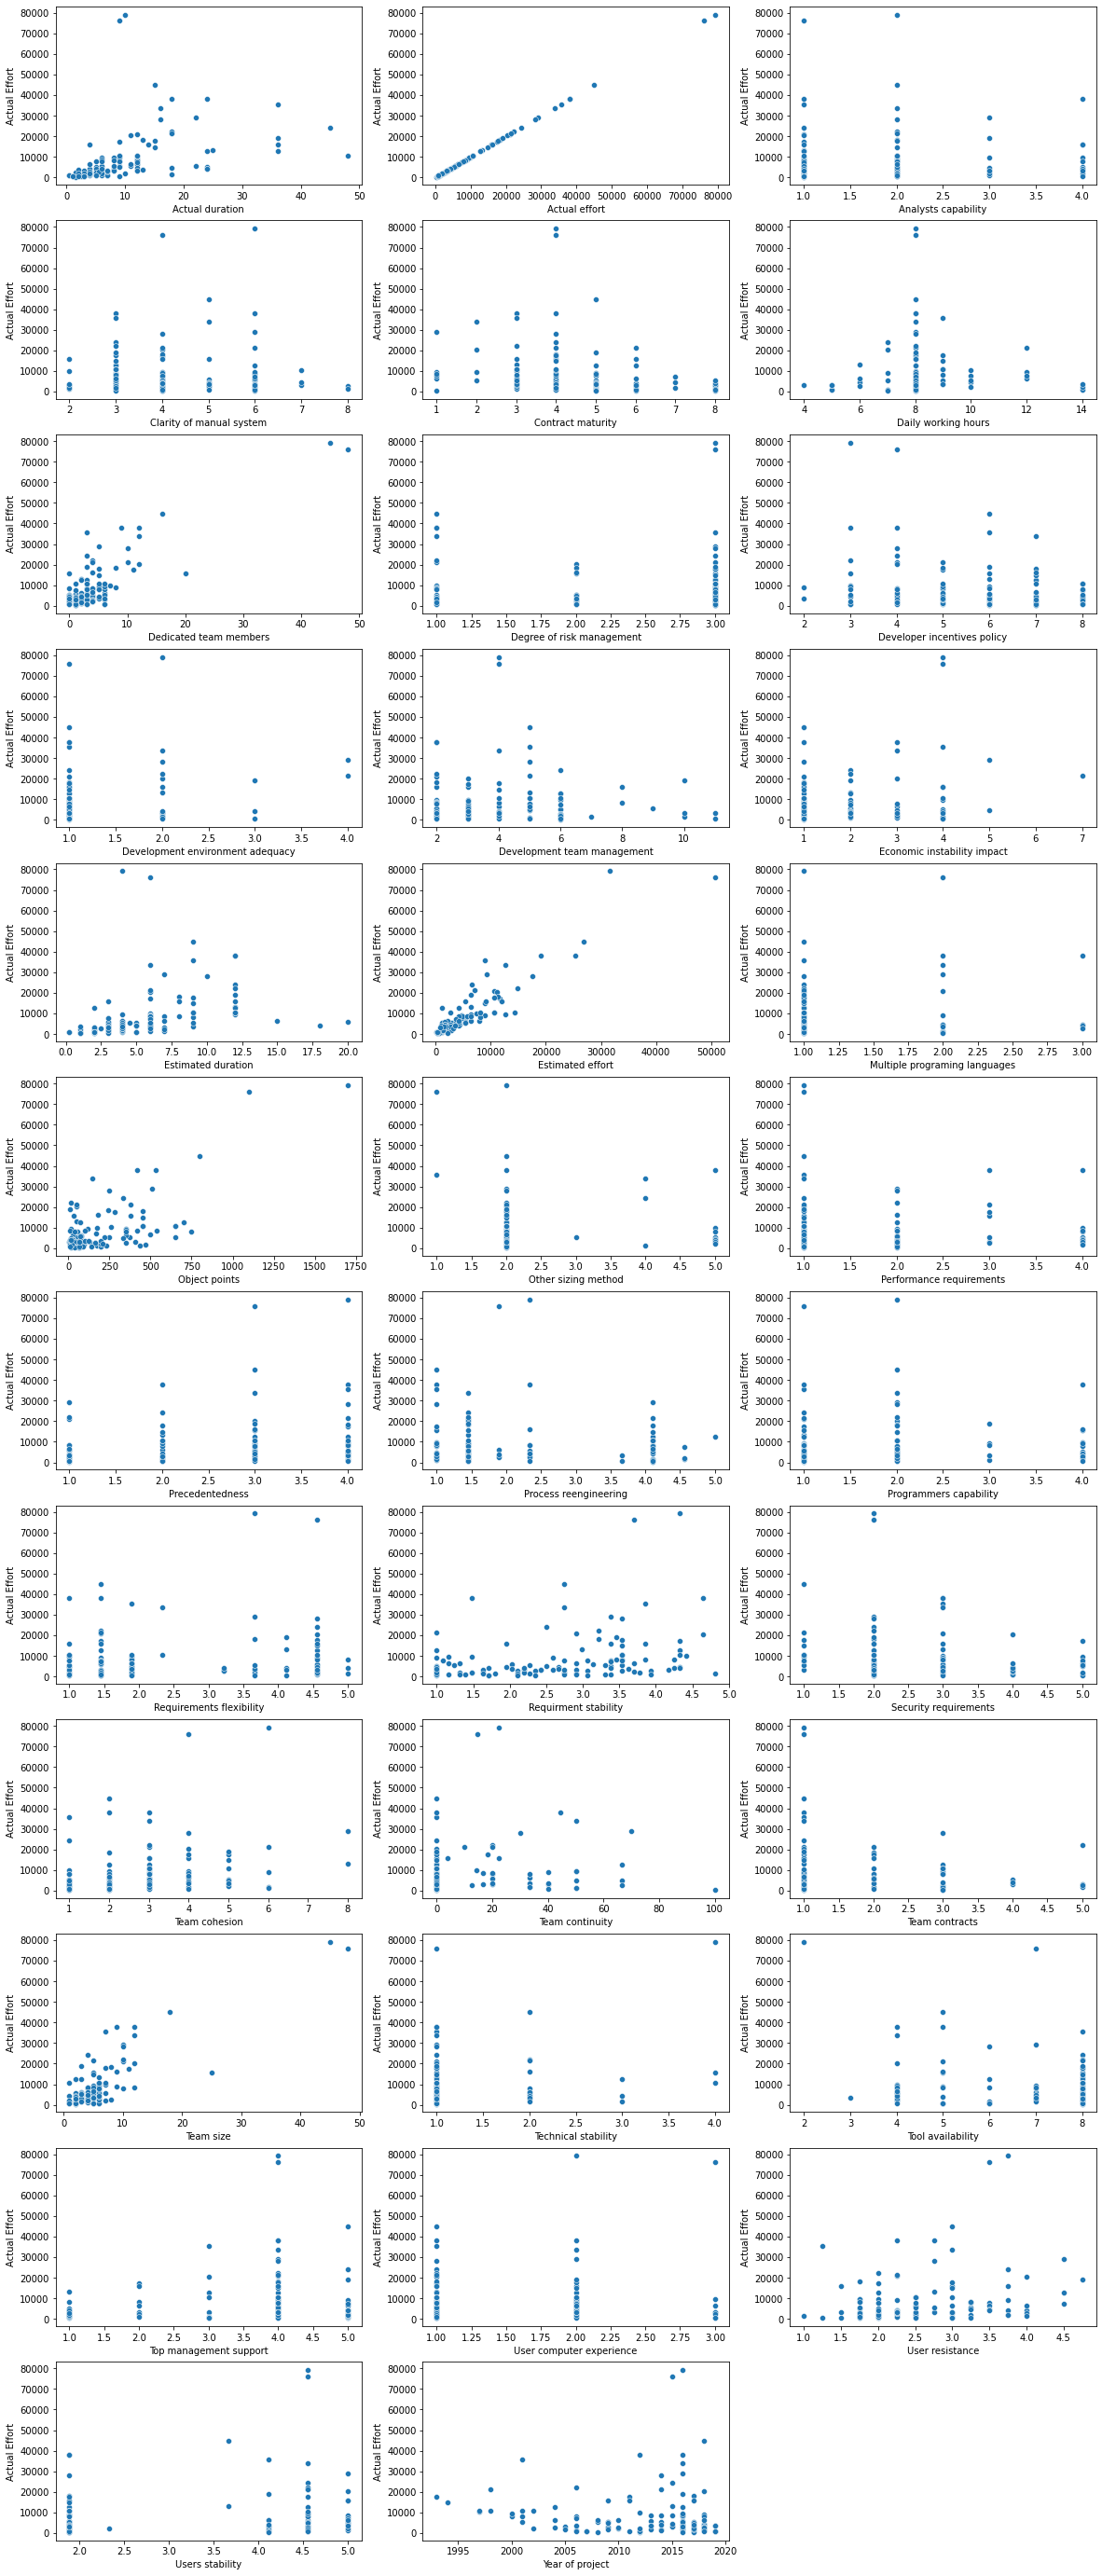

In [15]:
dv.numerical_cols_vs_effort(numerical_columns, df)

#### Results
1. ``Most dedicated team members are under 10 with an effort under 20000``
2. ``Most Team sizes are under 10 with an effort under 10000``

## Boxplots of Numerical Columns

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-p

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-p

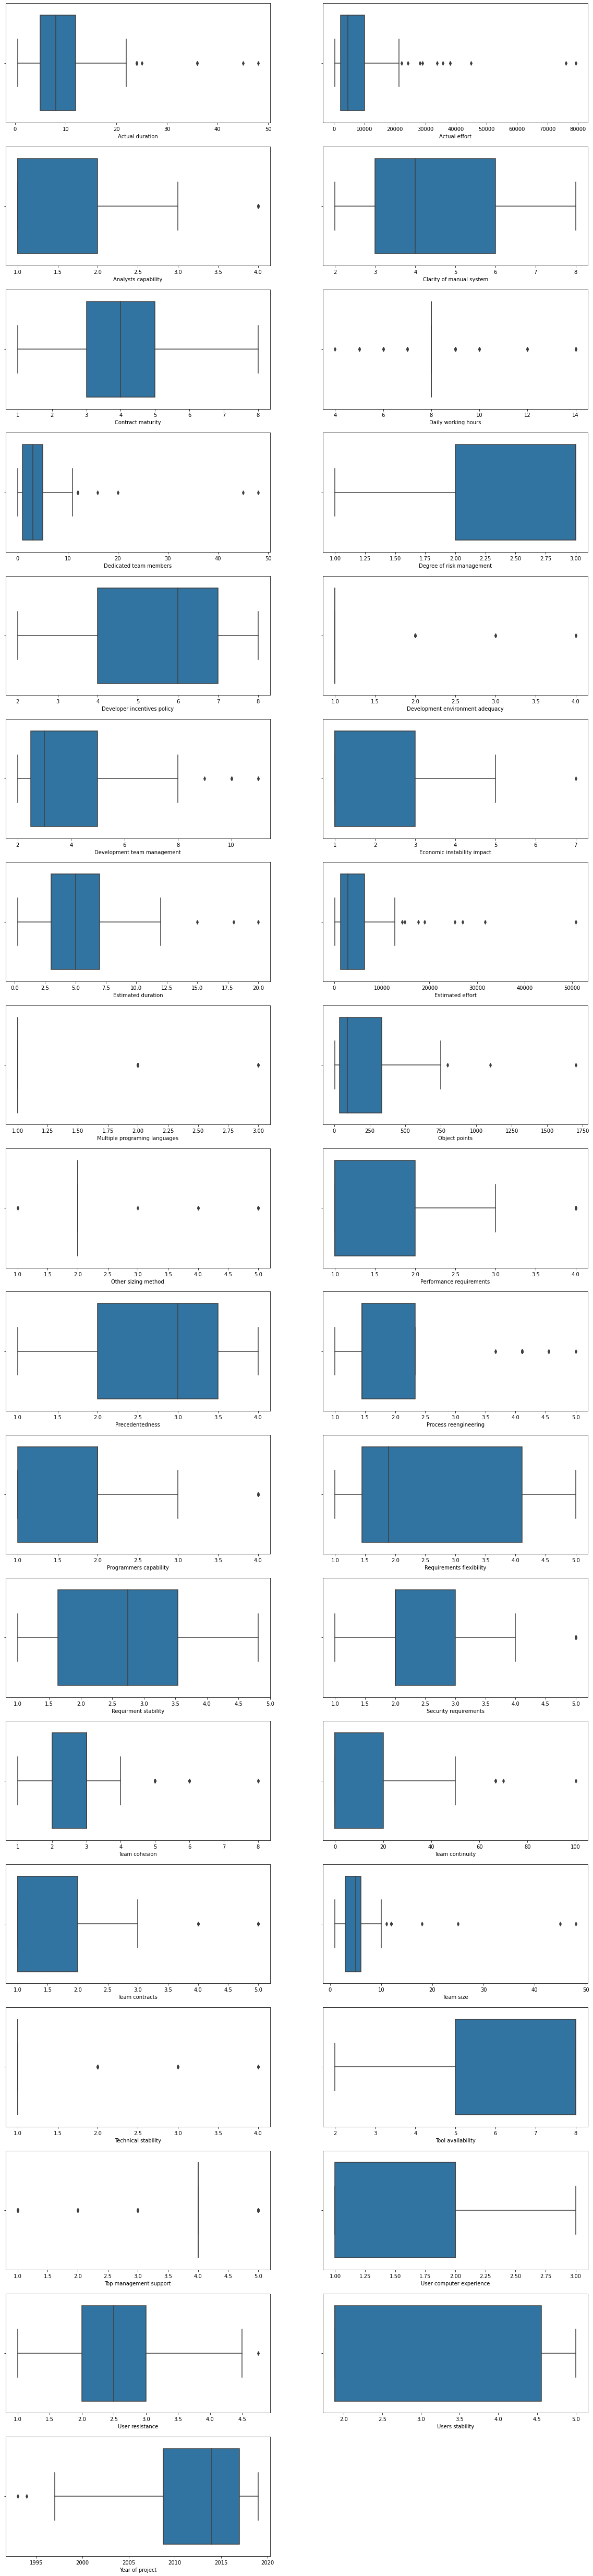

In [16]:
dv.boxplots(numerical_columns, df)

## Numerical null columns

These are numerical columns with null values

In [17]:
null_columns = dv.nan_columns_rates(df)
null_columns = null_columns[null_columns != 0]
numerical_null_columns = [col for col in numerical_columns if col in null_columns]

### Impact of null values on the effort

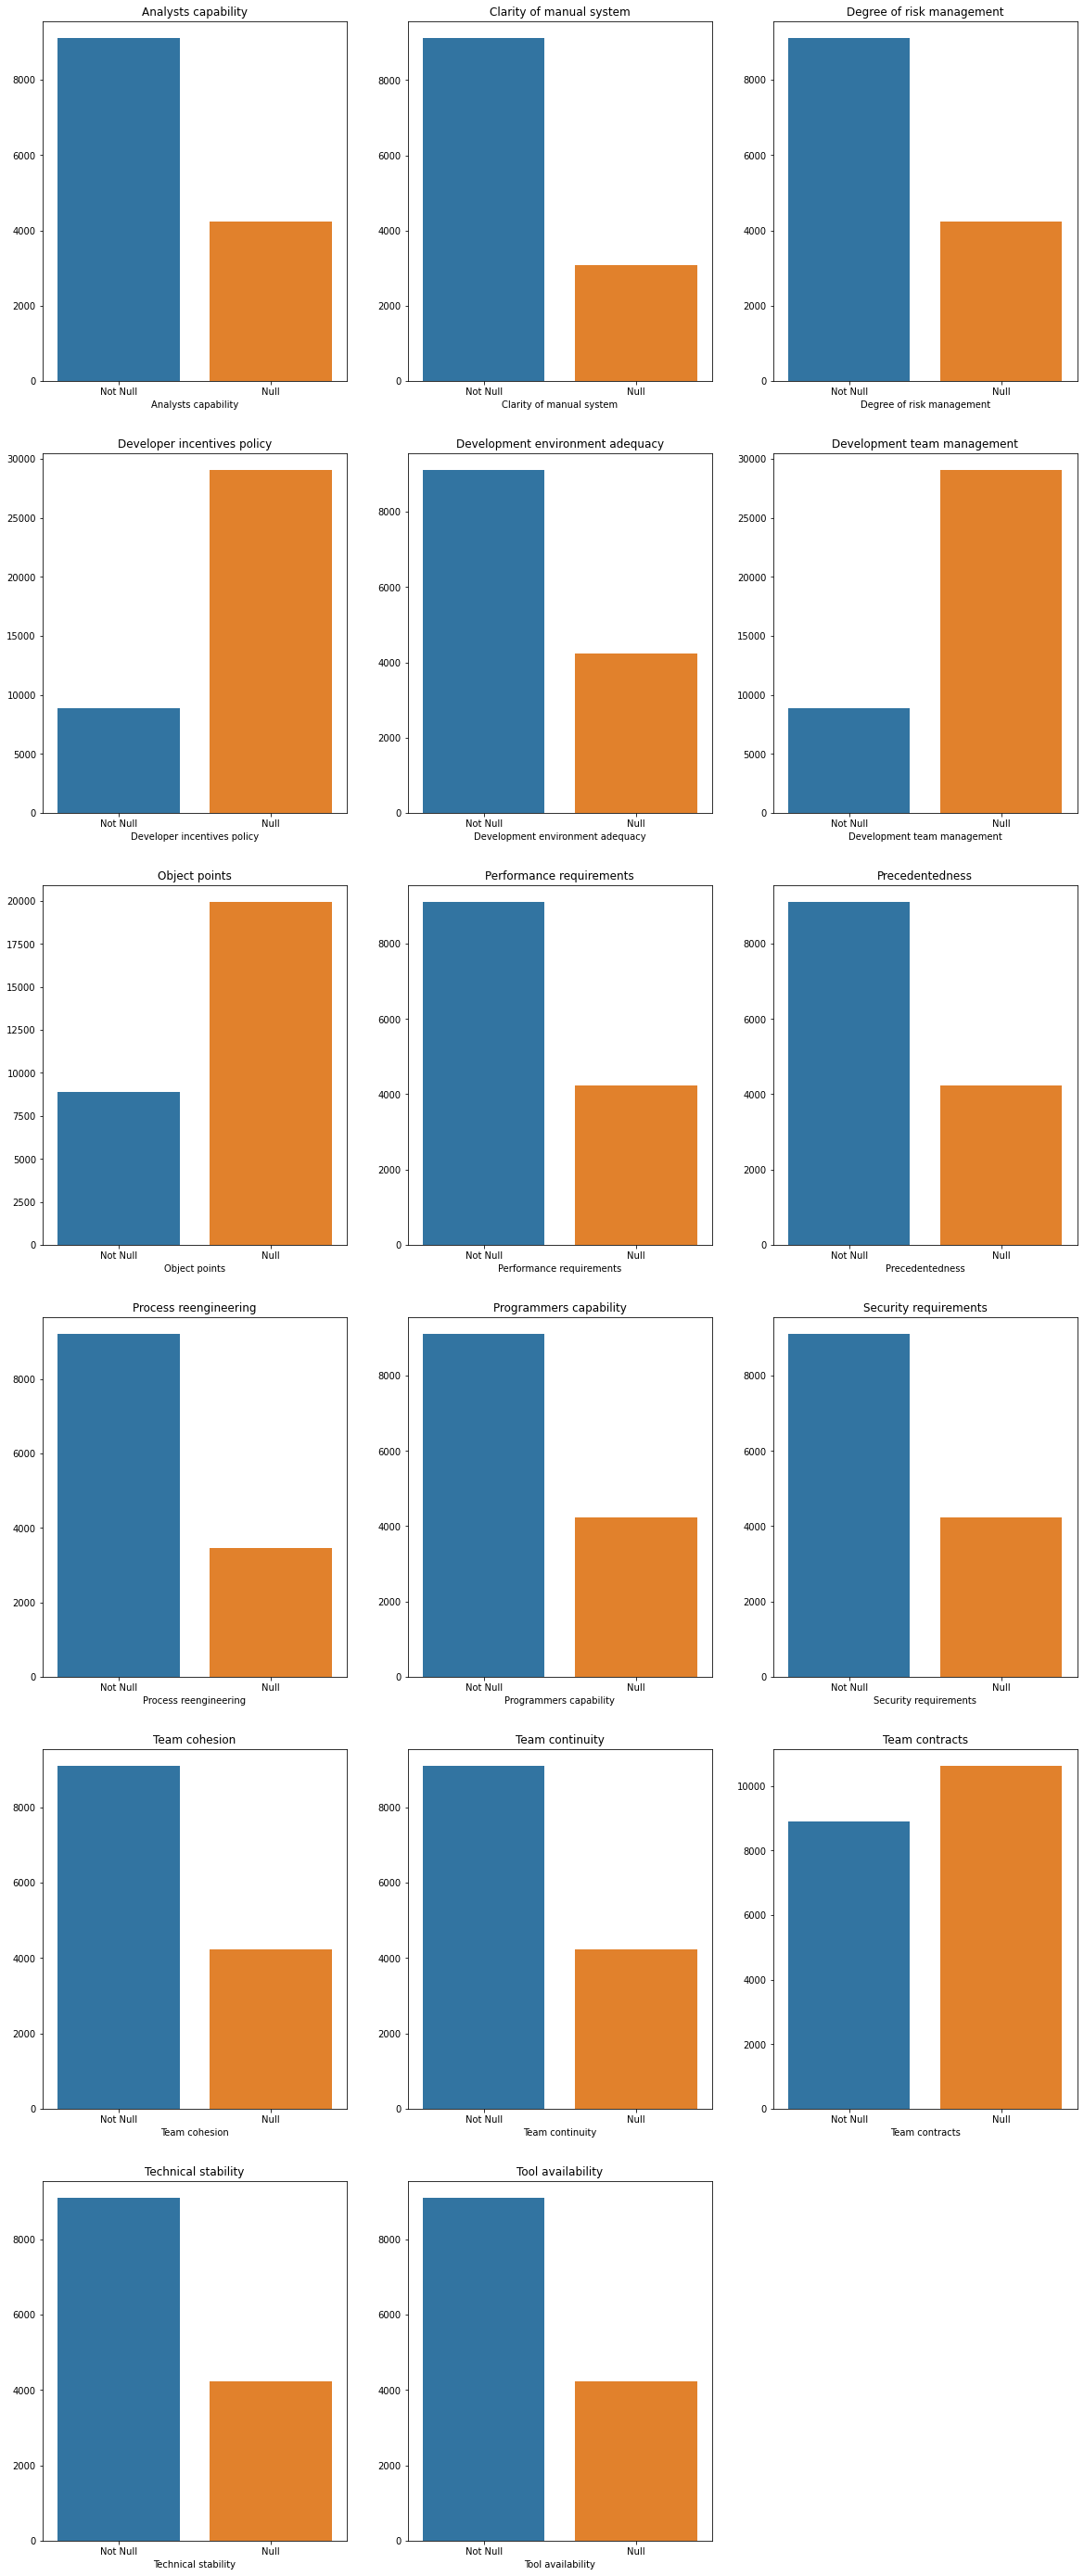

In [18]:
dv.nan_cols_and_actual_effort(df, numerical_null_columns)

# Categorical columns Visualization

In [19]:
categorical_columns = dd.categorical_cols_names()
categorical_columns = [col for col in categorical_columns if col in df.columns]
categorical_columns.sort()

## Frequencies of categories

C:\Users\User\Desktop\INSEA\MFE\Software Cost Estimation Project\src\data_visualization.py:104: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (9, 9))


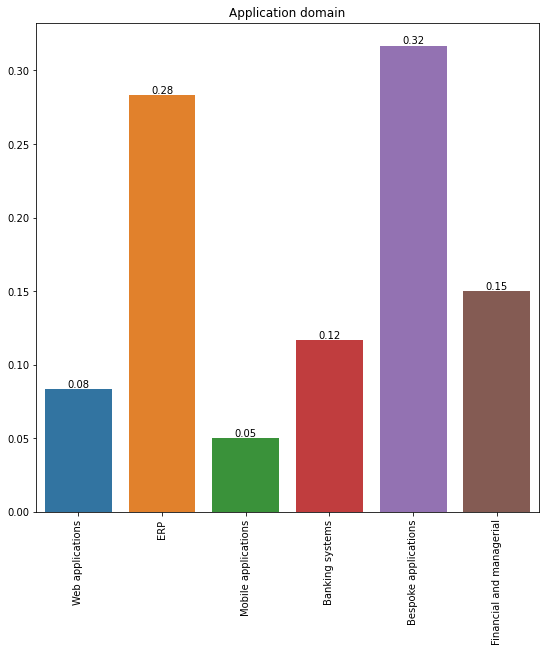

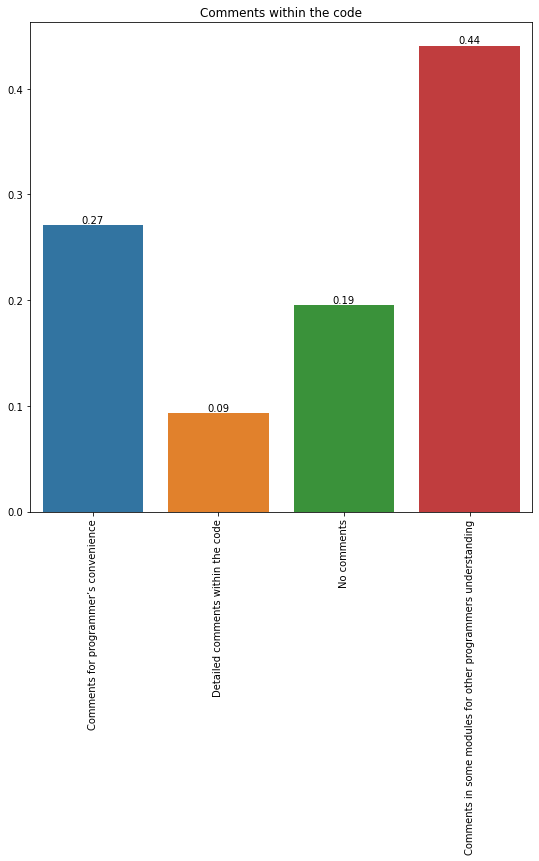

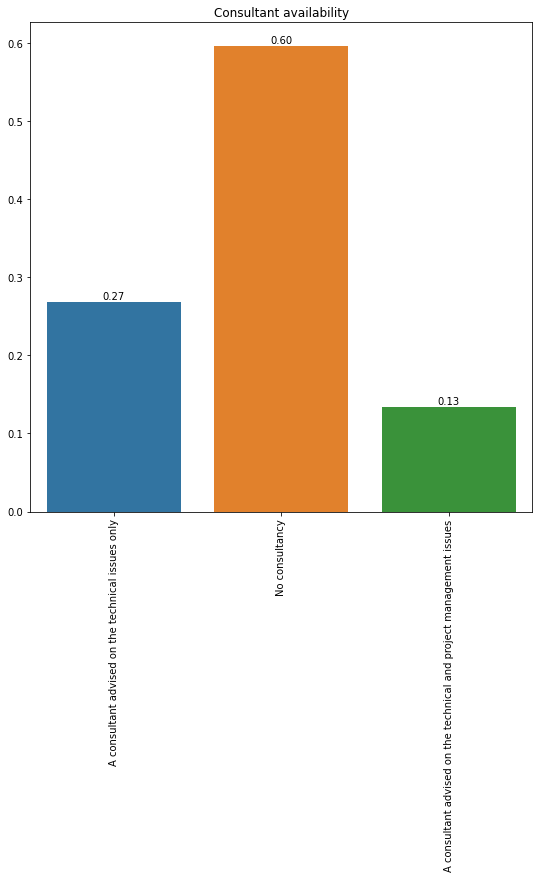

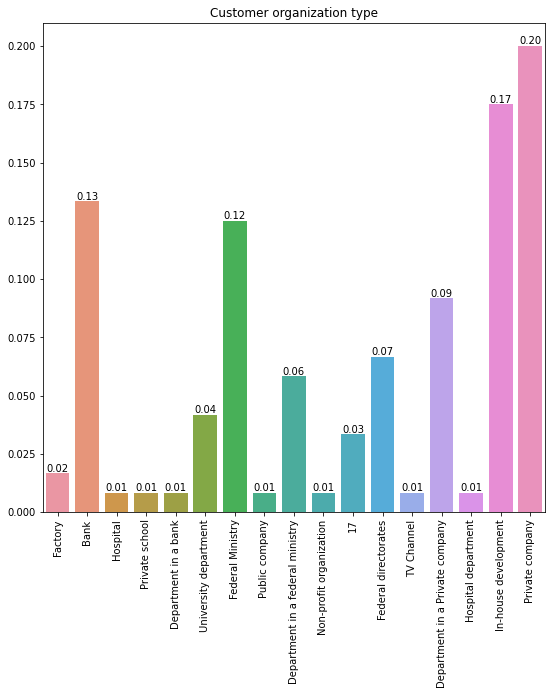

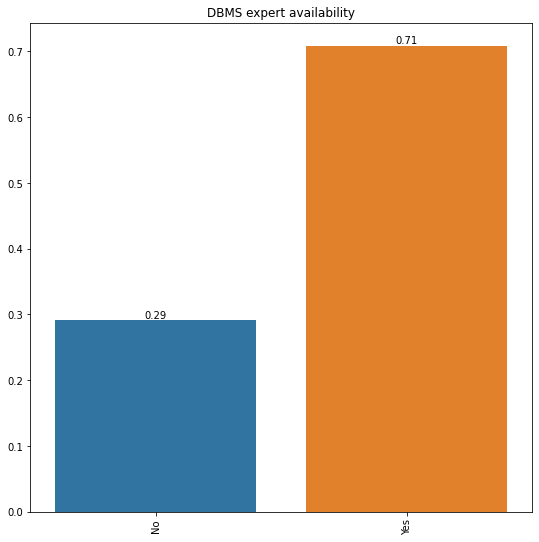

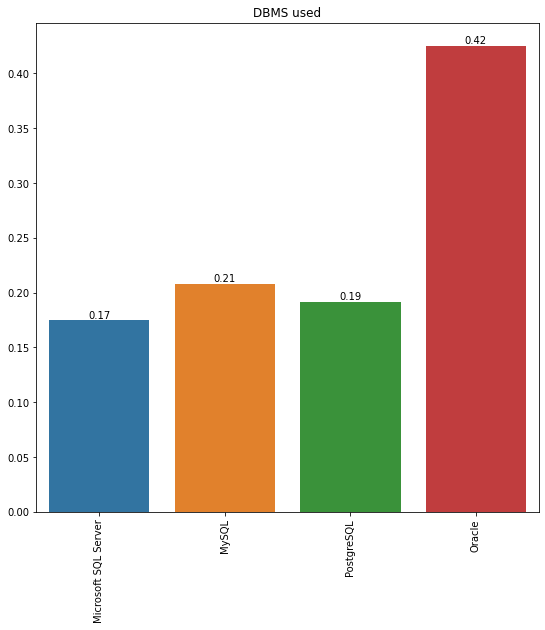

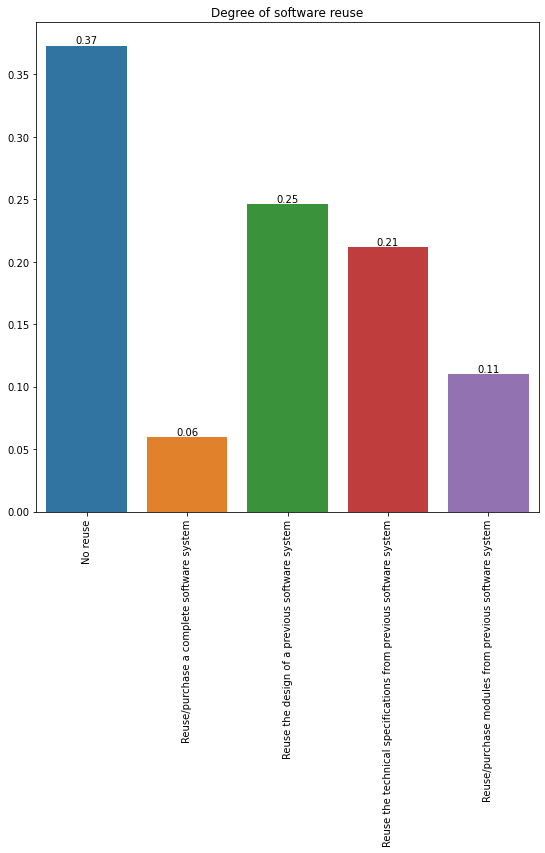

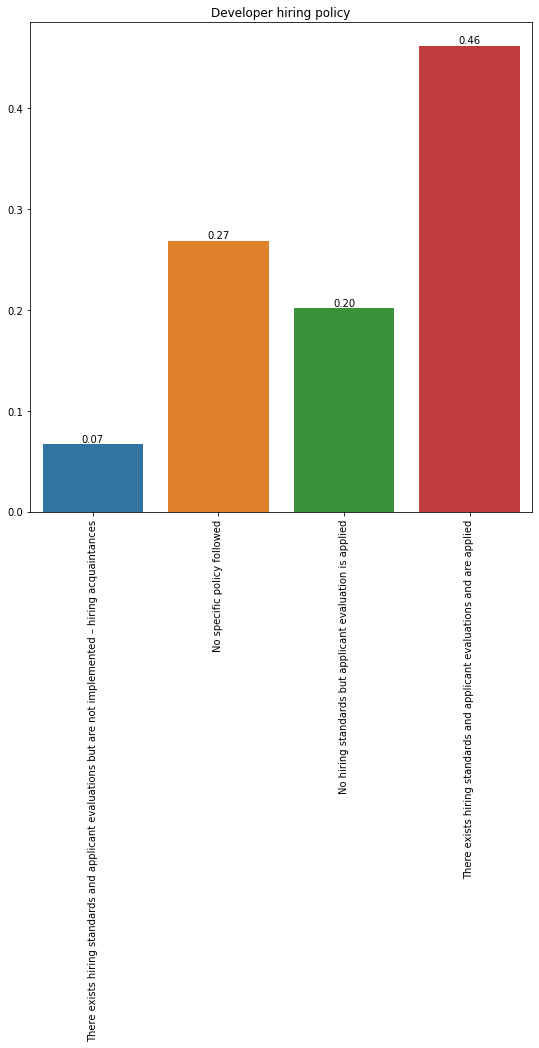

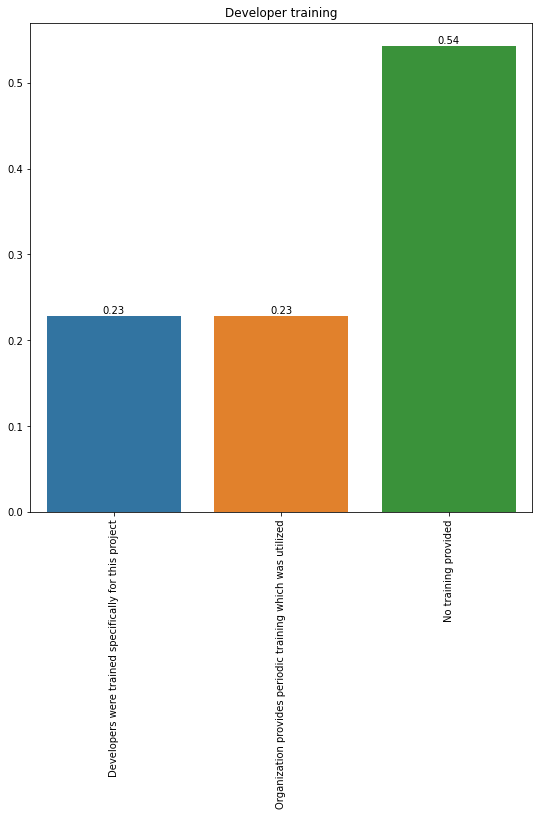

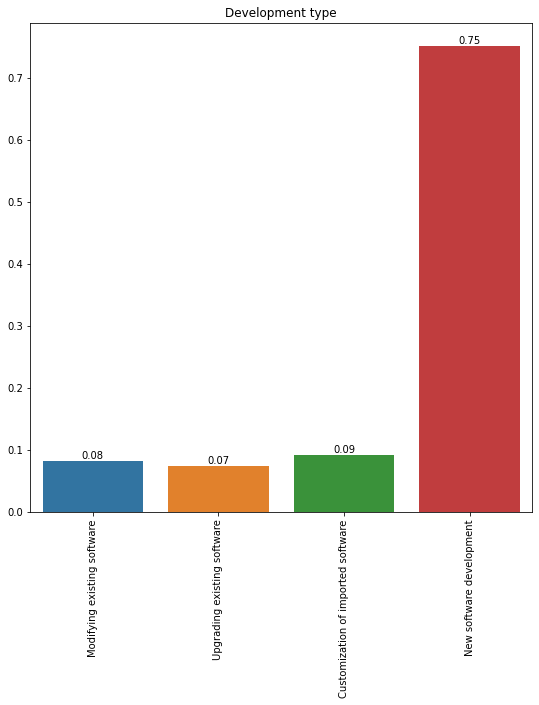

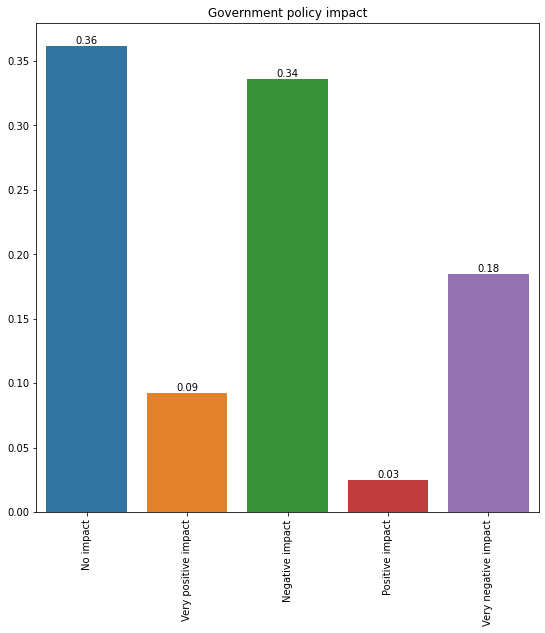

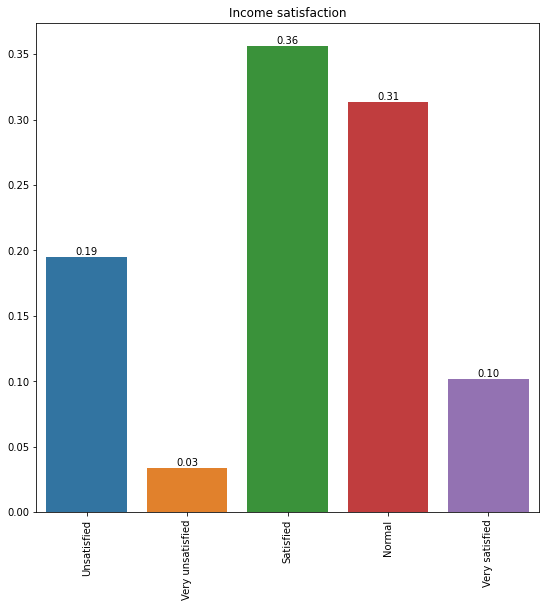

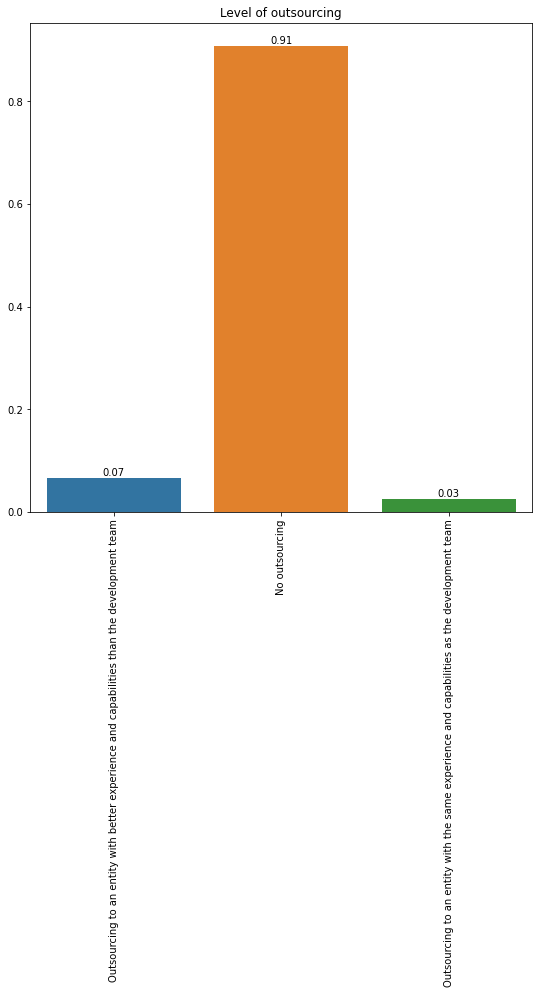

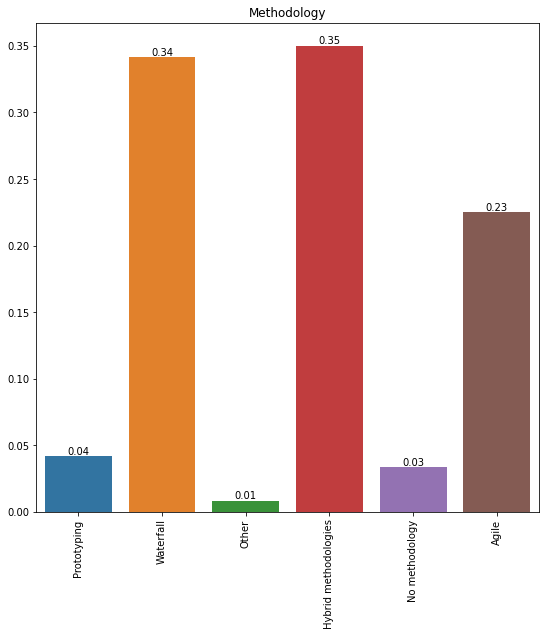

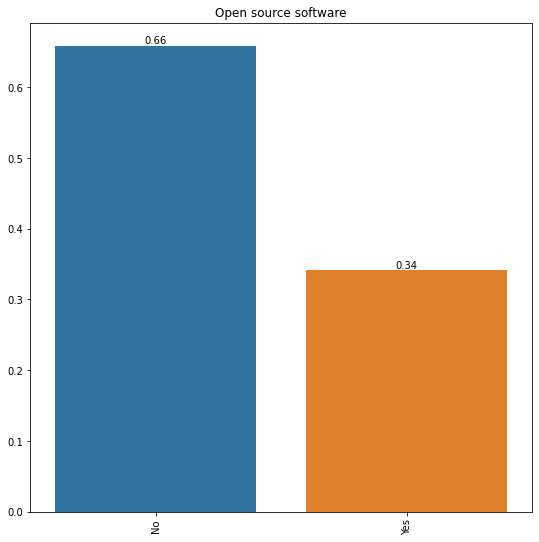

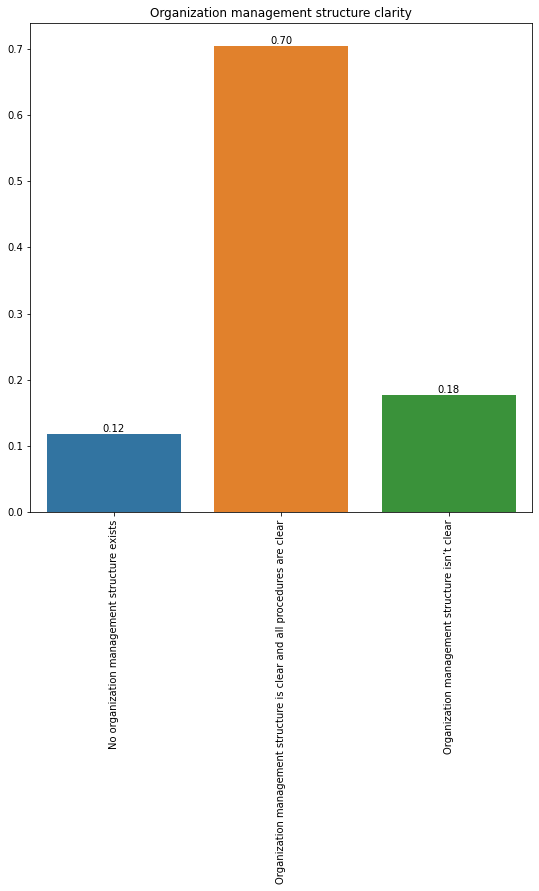

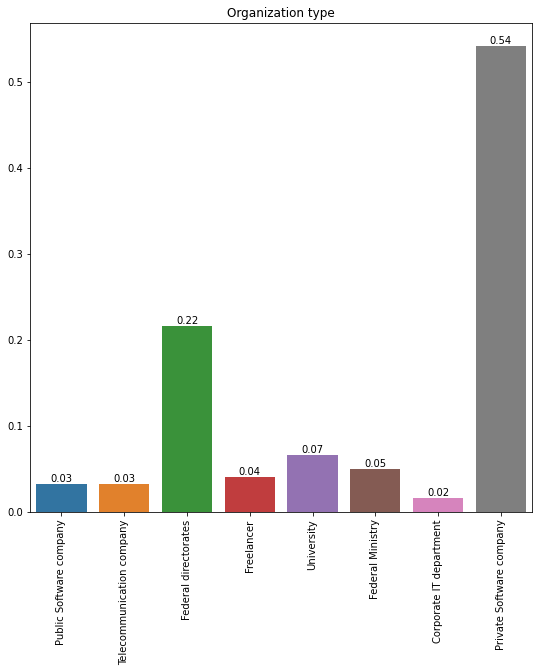

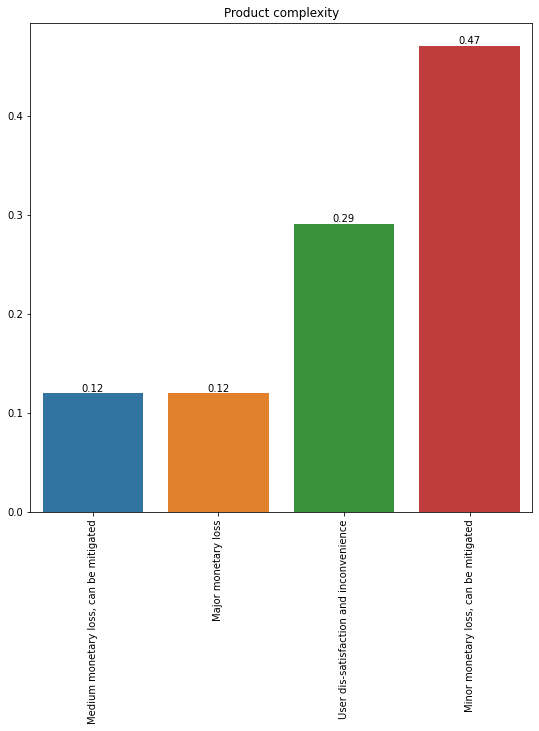

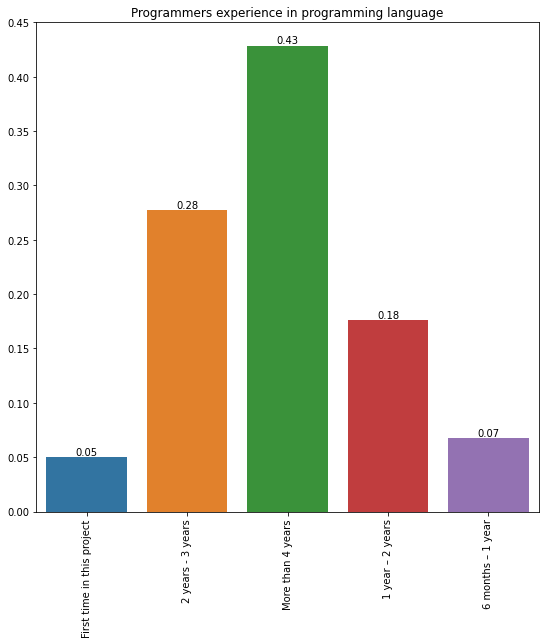

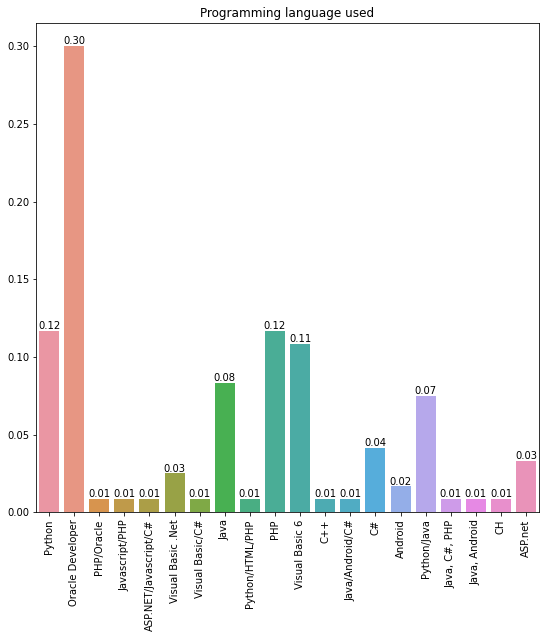

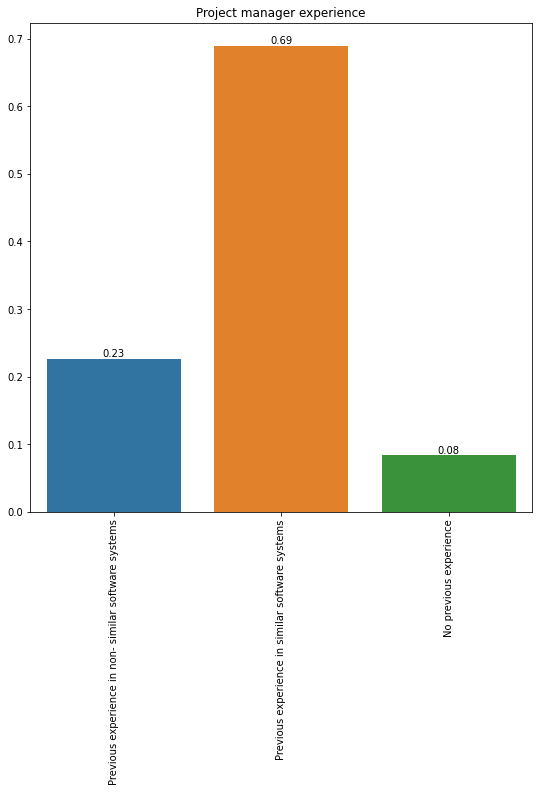

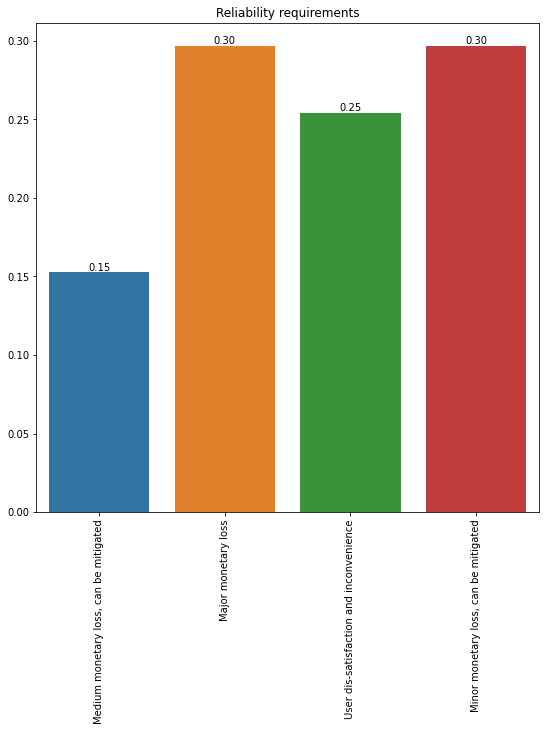

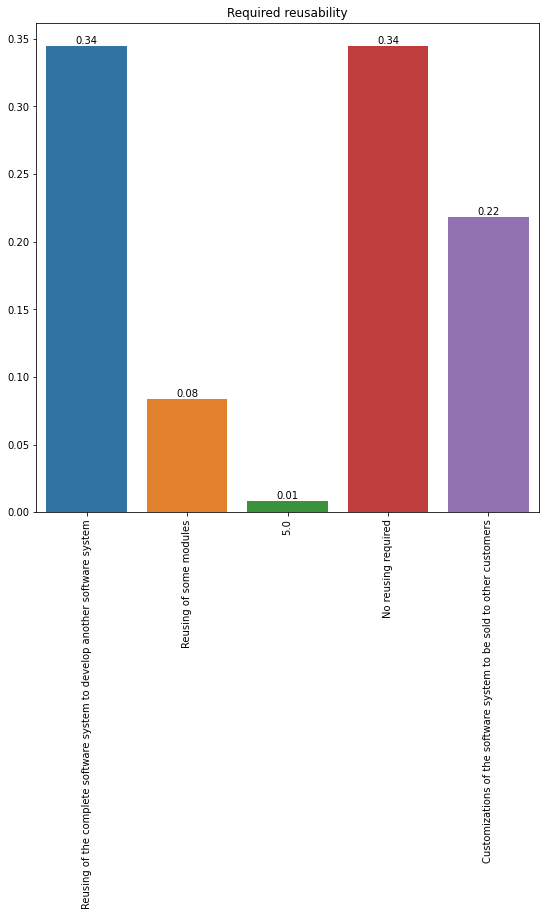

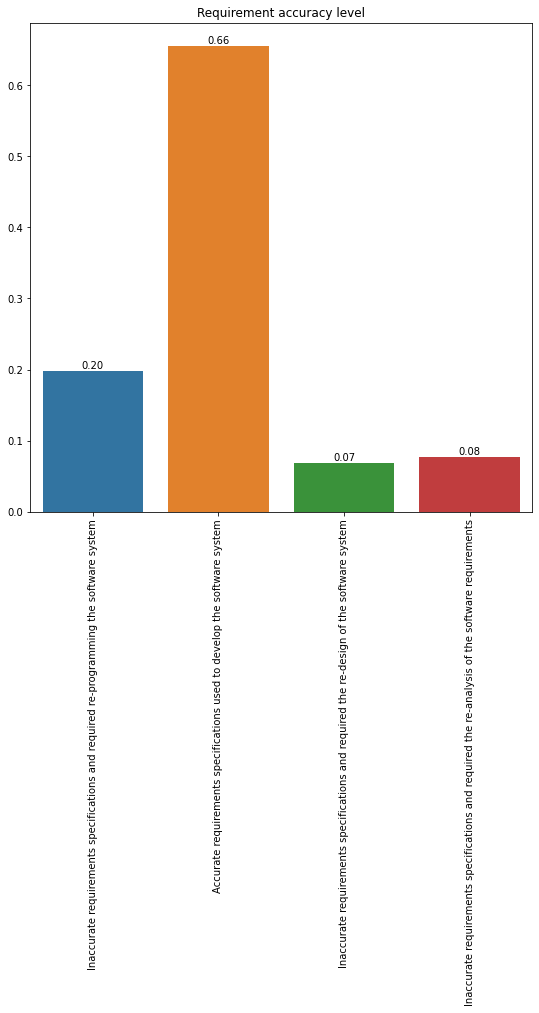

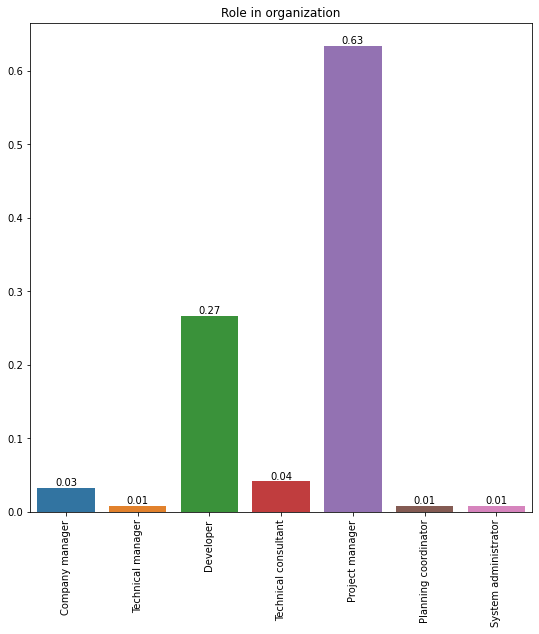

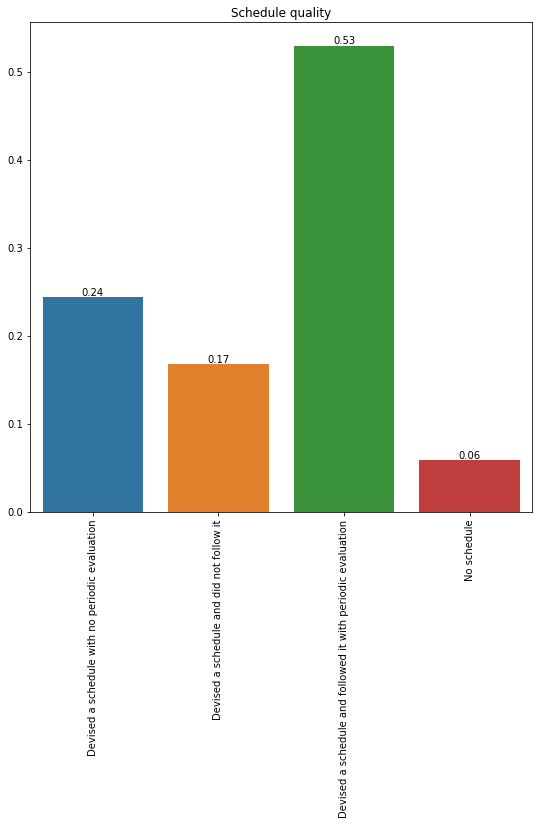

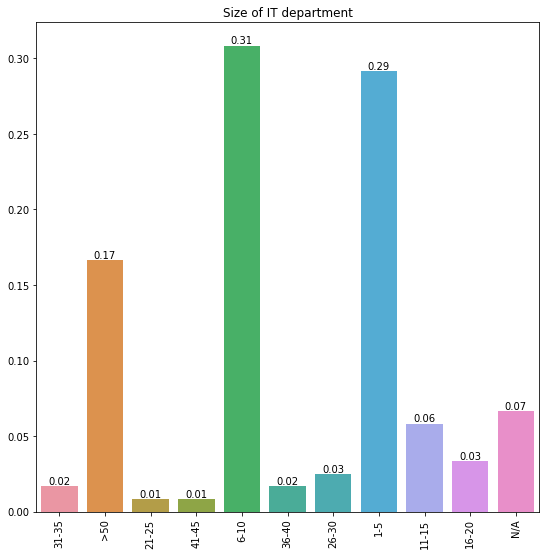

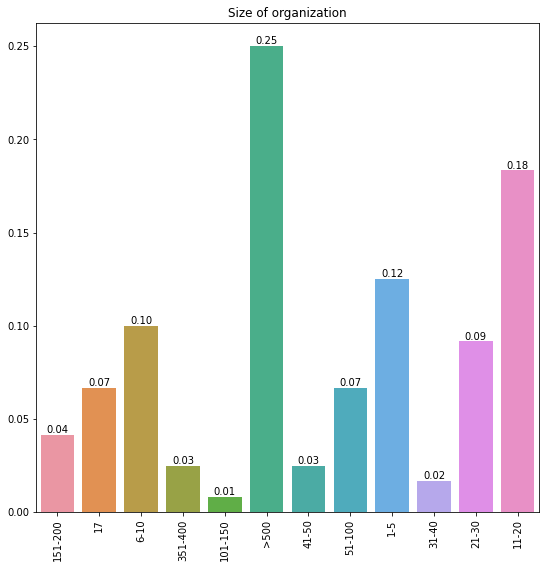

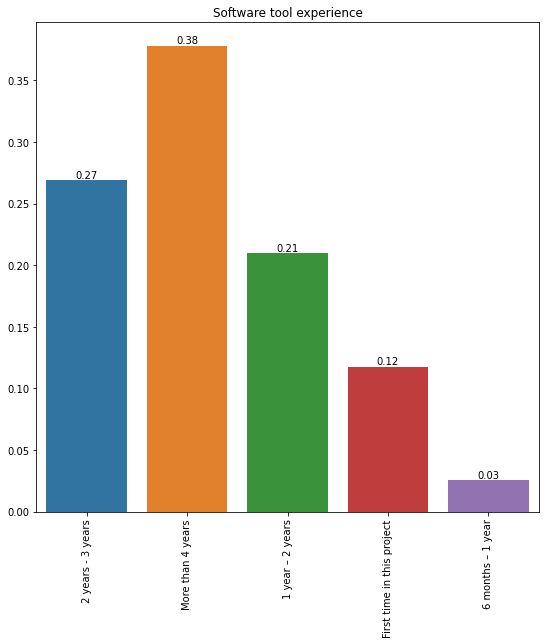

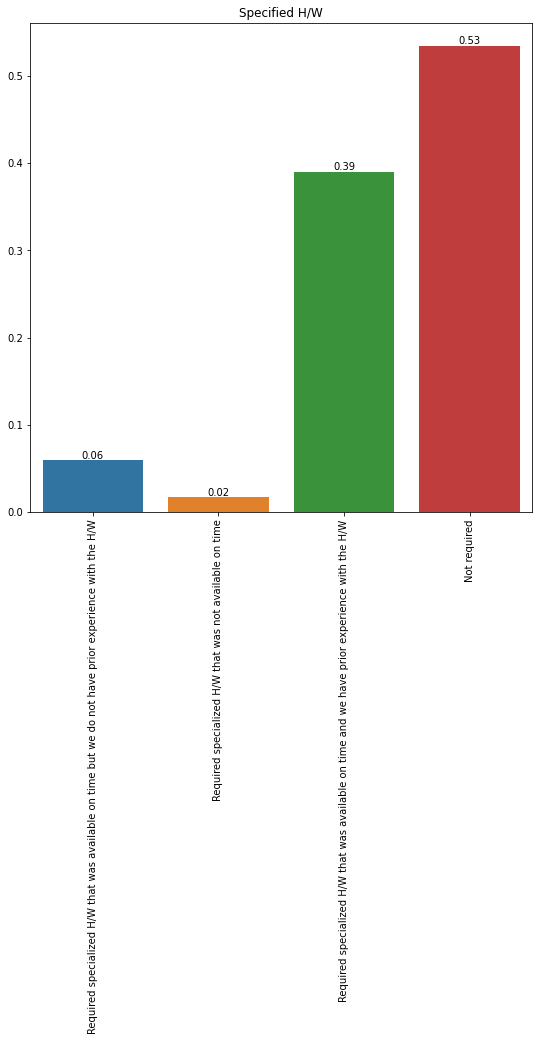

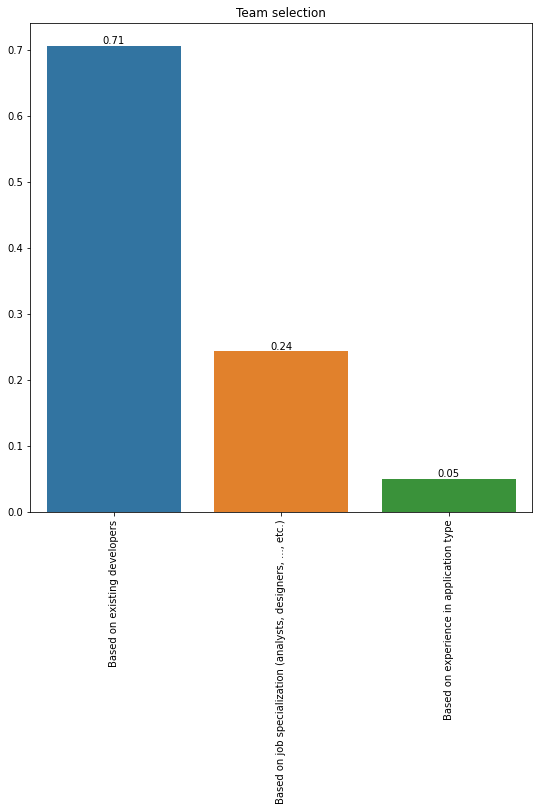

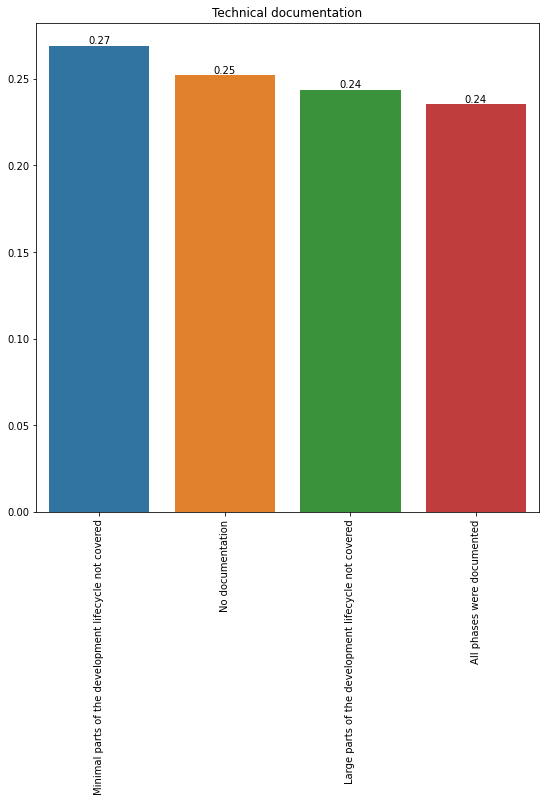

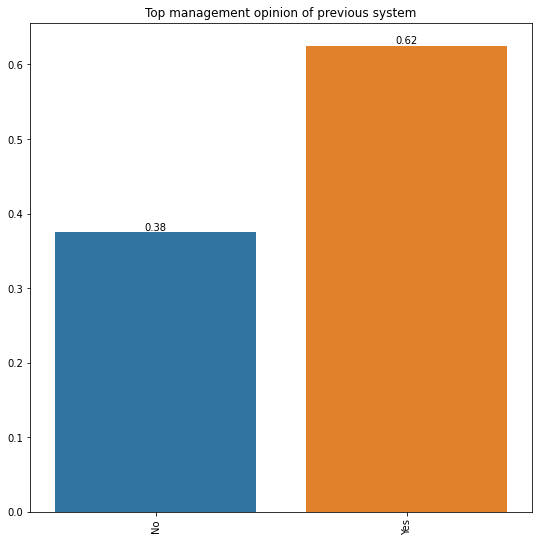

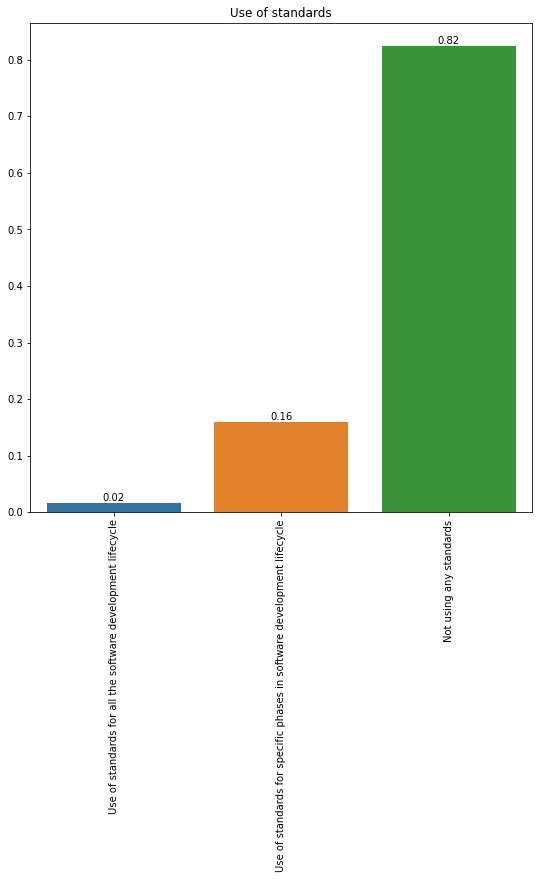

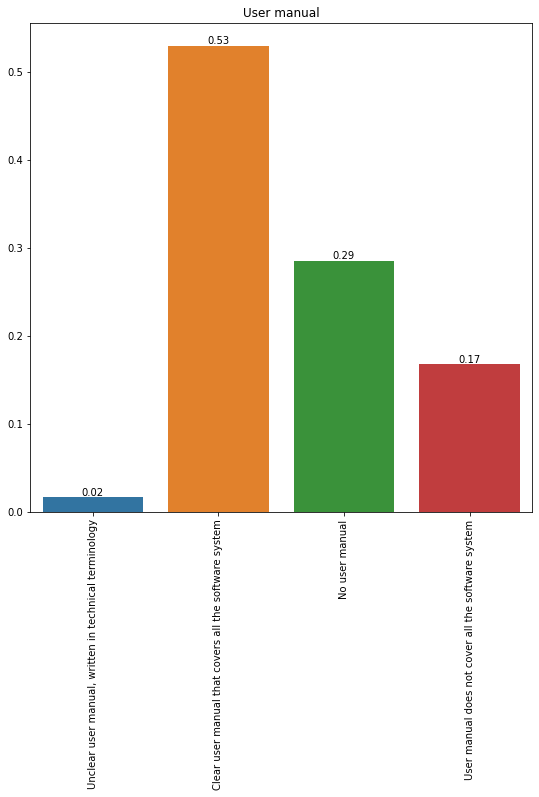

In [20]:
for col in categorical_columns:
    dv.bar_plot_count(df[col], col, dd.values_meaning(col))

## Boxplots of categorical columns

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-p

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-p

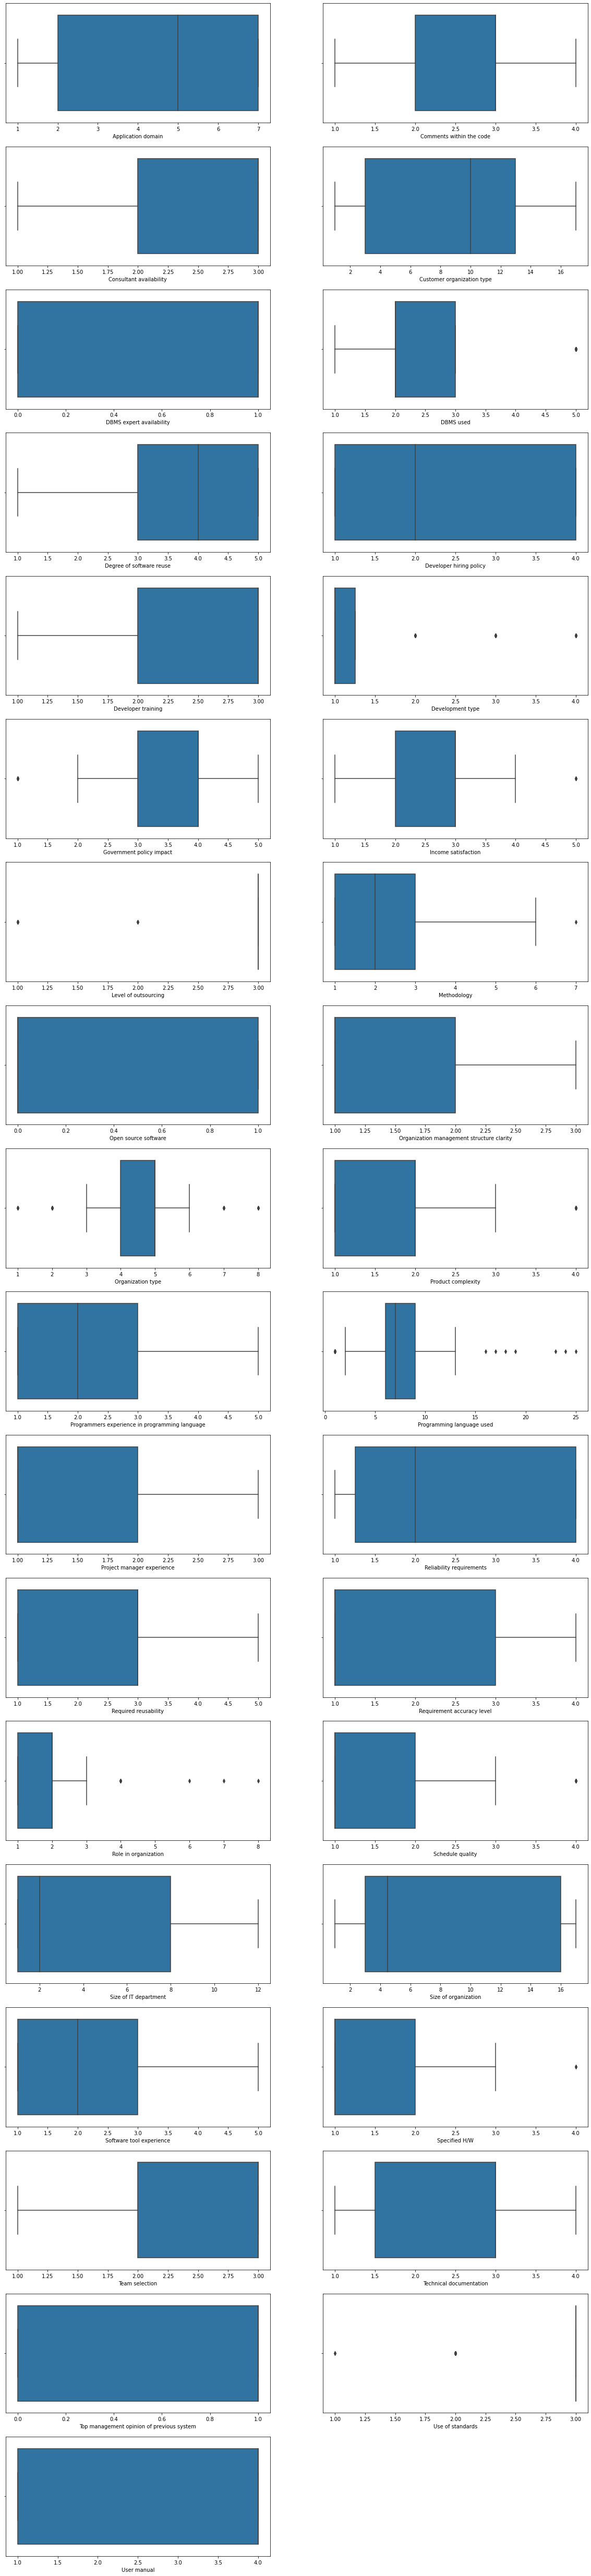

In [21]:
dv.boxplots(categorical_columns, df)

##### ``17' value in Software organization size has no meaning, same for Customer organization type, and'5' value in Required reusability `` 

## Actual effort vs categorical columns

In [22]:
df_categorical = df[categorical_columns]
for col in categorical_columns:
    df_categorical[col] = df_categorical[col].replace(dd.values_meaning(col))

<ipython-input-22-bea1fcf8c065>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[col] = df_categorical[col].replace(dd.values_meaning(col))


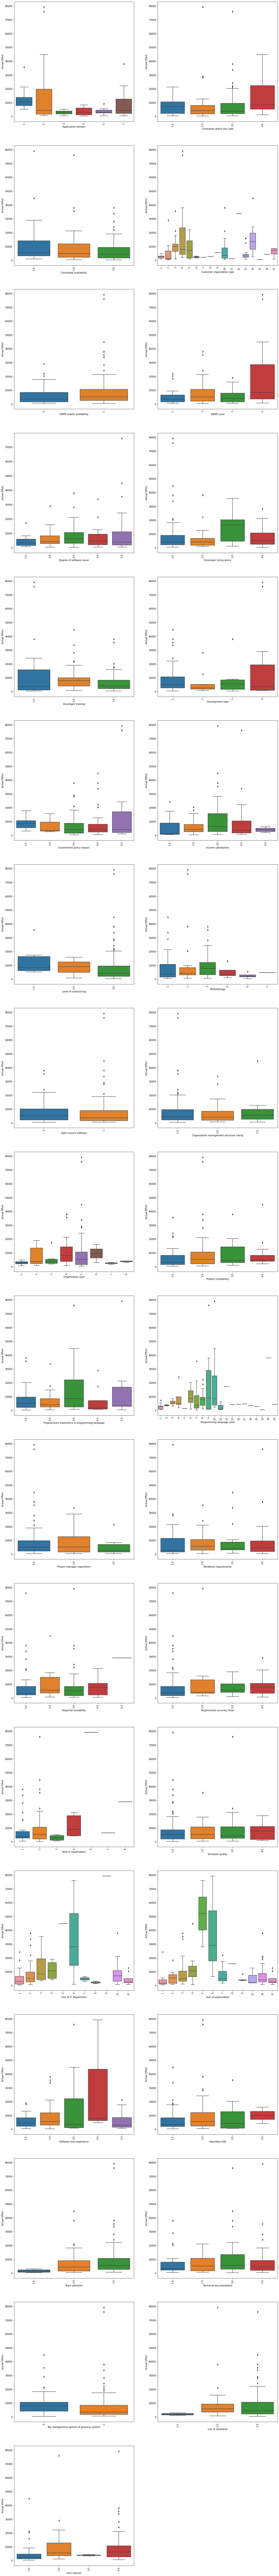

In [23]:
dv.categorical_cols_vs_effort(df[categorical_columns], df['Actual effort'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:261

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt

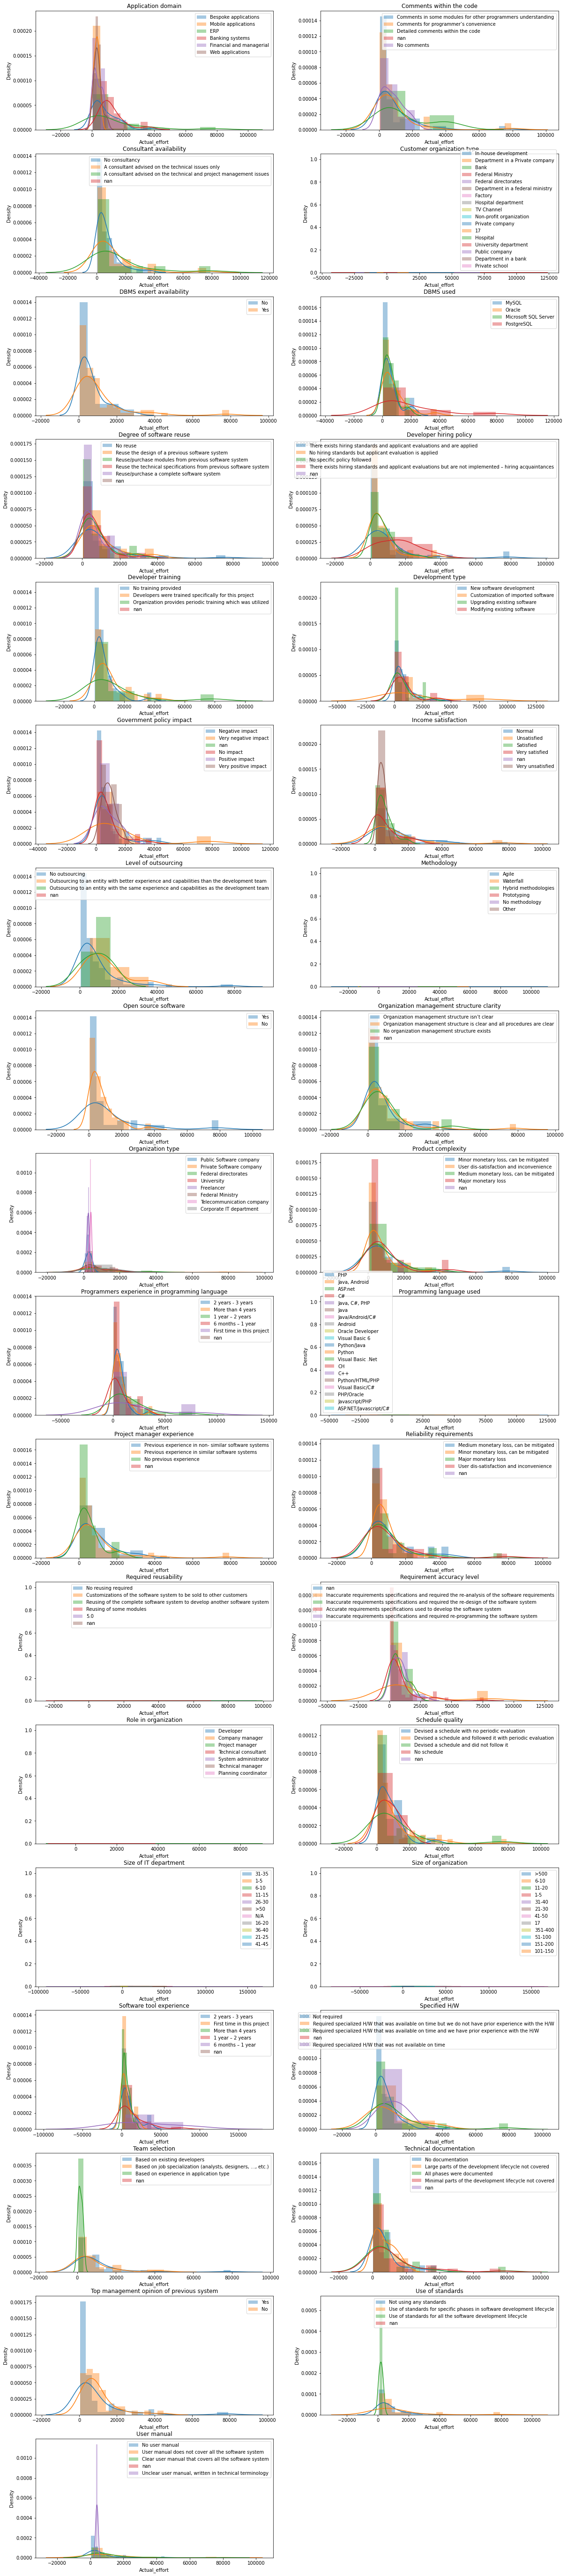

In [24]:
dv.categorical_cols_histograms_vs_effort(df_categorical, df['Actual effort'])

## Anova Test

In [25]:
df_categorical = df_categorical.assign(Actual_effort = df['Actual effort'])

In [26]:
dv.anova_test(df_categorical, 'Application domain')

Null hypothesis: The mean of the groups are equal
Sample size is 6
F_onewayResult(statistic=2.706397191868164, pvalue=0.03914141097403595)
Null hypothesis rejected


In [27]:
dv.correlation_actualEffort_categoricalData(categorical_columns, df).sort_values(ascending = False)

Size of IT department                             0.492990
Size of organization                              0.388515
Role in organization                              0.295367
Programming language used                         0.225450
Customer organization type                        0.215939
DBMS used                                         0.148907
Software tool experience                          0.127850
Application domain                                0.105146
Programmers experience in programming language    0.100691
Income satisfaction                               0.066615
Development type                                  0.062385
Developer training                                0.047097
Consultant availability                           0.043586
Government policy impact                          0.040145
Specified H/W                                     0.039826
User manual                                       0.039551
Organization type                                 0.0384

## Cramer's V test
#### Testing the association between categorical variables

In [28]:
association_tests = dv.cramers_association(df[categorical_columns])  

In [29]:
association_tests[association_tests > 0.6]

Application domain  \
Application domain                                              1   
Comments within the code                                      NaN   
Consultant availability                                       NaN   
Customer organization type                                    NaN   
DBMS expert availability                                      NaN   
DBMS used                                                     NaN   
Degree of software reuse                                      NaN   
Developer hiring policy                                       NaN   
Developer training                                            NaN   
Development type                                              NaN   
Government policy impact                                      NaN   
Income satisfaction                                           NaN   
Level of outsourcing                                          NaN   
Methodology                                                   NaN   
Open source software                                          NaN   
Organization management structure clarity                     NaN   
Organization type                                             NaN   
Product complexity                                            NaN   
Programmers experience in programming language                NaN   
Programming language used                                  0.6393   
Project manager experience                                    NaN   
Reliability requirements                                      NaN   
Required reusability                                          NaN   
Requirement accuracy level                                    NaN   
Role in organization                                          NaN   
Schedule quality                                              NaN   
Size of IT department                                         NaN   
Size of organization                                          NaN   
Software tool experience                                      NaN   
Specified H/W                                                 NaN   
Team selection                                                NaN   
Technical documentation                                       NaN   
Top management opinion of previous system                     NaN   
Use of standards                                              NaN   
User manual                                                   NaN   

                                               Comments within the code  \
Application domain                                                  NaN   
Comments within the code                                              1   
Consultant availability                                             NaN   
Customer organization type                                          NaN   
DBMS expert availability                                            NaN   
DBMS used                                                           NaN   
Degree of software reuse                                            NaN   
Developer hiring policy                                             NaN   
Developer training                                                  NaN   
Development type                                                    NaN   
Government policy impact                                            NaN   
Income satisfaction                                                 NaN   
Level of outsourcing                                                NaN   
Methodology                                                         NaN   
Open source software                                                NaN   
Organization management structure clarity                           NaN   
Organization type                                                   NaN   
Product complexity                                                  NaN   
Programmers experience in programming language                      NaN   
Programming language used                                     

In [30]:
(association_tests[association_tests > 0.6].sum() - 1).sort_values(ascending = False)

Programming language used                         2.9840
DBMS used                                         1.4991
Use of standards                                  0.7087
Application domain                                0.6393
Open source software                              0.5001
Customer organization type                        0.0000
Consultant availability                           0.0000
Degree of software reuse                          0.0000
Developer hiring policy                           0.0000
Developer training                                0.0000
Organization type                                 0.0000
Government policy impact                          0.0000
Income satisfaction                               0.0000
Level of outsourcing                              0.0000
Methodology                                       0.0000
Comments within the code                          0.0000
Organization management structure clarity         0.0000
Development type               

High Cramer's V
1. `Programming language used: DBMS used (0.8175), Open Source software (0.8185), Use of standards (0.7087), Application domain (0.6393)`
2. `Open source Software: DBMS used (0.6816)`

<AxesSubplot:xlabel='Use of standards', ylabel='Programming language used'>

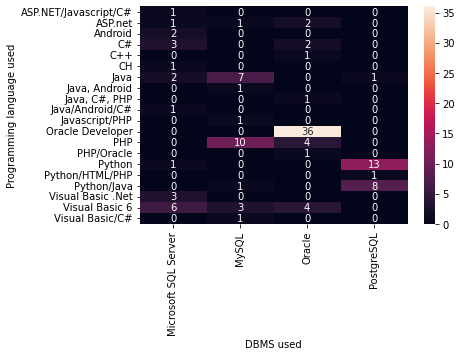

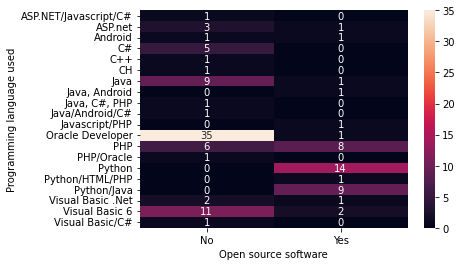

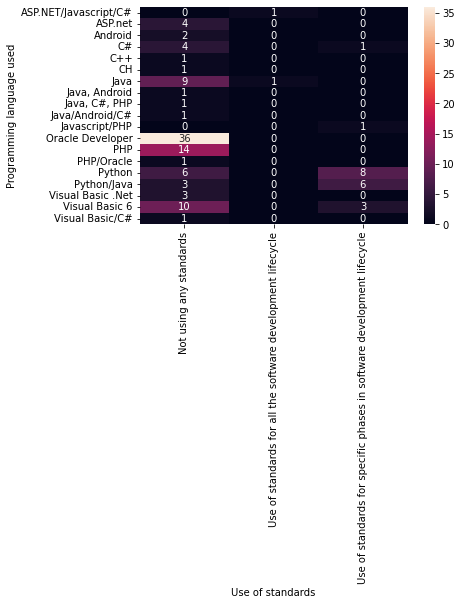

In [31]:
plt.figure()
sns.heatmap(pd.crosstab(df_categorical['Programming language used'], df_categorical['DBMS used']), annot = True)
plt.figure()
sns.heatmap(pd.crosstab(df_categorical['Programming language used'], df_categorical['Open source software']), annot = True)
plt.figure()
sns.heatmap(pd.crosstab(df_categorical['Programming language used'], df_categorical['Use of standards']), annot = True)

<AxesSubplot:xlabel='DBMS used', ylabel='Open source software'>

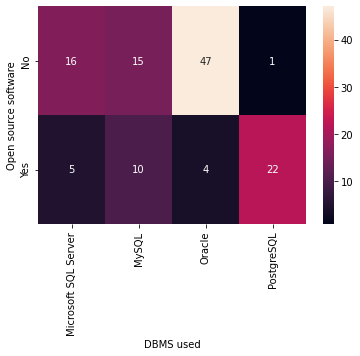

In [32]:
plt.figure()
sns.heatmap(pd.crosstab(df_categorical['Open source software'], df_categorical['DBMS used']), annot = True)

## Kendall Tau association

In [33]:
ordinal_columns = dd.ordinal_categories()

In [34]:
dv.kendall_tau_association(df, ordinal_columns)

Size of organization  \
Size of organization                                              1   
Size of IT department                                       0.70628   
Government policy impact                                        NaN   
User manual                                                     NaN   
Users stability                                         -0.00671972   
Programmers experience in programming language                  NaN   
Software tool experience                                        NaN   
Income satisfaction                                             NaN   
Product complexity                                              NaN   
Reliability requirements                                        NaN   

                                               Size of IT department  \
Size of organization                                         0.70628   
Size of IT department                                              1   
Government policy impact                                         NaN   
User manual                                                      NaN   
Users stability                                            0.0258063   
Programmers experience in programming language                   NaN   
Software tool experience                                         NaN   
Income satisfaction                                              NaN   
Product complexity                                               NaN   
Reliability requirements                                         NaN   

                                               Government policy impact  \
Size of organization                                                NaN   
Size of IT department                                               NaN   
Government policy impact                                            NaN   
User manual                                                         NaN   
Users stability                                                     NaN   
Programmers experience in programming language                      NaN   
Software tool experience                                            NaN   
Income satisfaction                                                 NaN   
Product complexity                                                  NaN   
Reliability requirements                                            NaN   

                                               User manual Users stability  \
Size of organization                                   NaN     -0.00671972   
Size of IT department                                  NaN       0.0258063   
Government policy impact                               NaN             NaN   
User manual                                            NaN             NaN   
Users stability                                        NaN               1   
Programmers experience in programming language         NaN             NaN   
Software tool experience                               NaN             NaN   
Income satisfaction                                    NaN             NaN   
Product complexity                                     NaN             NaN   
Reliability requirements                               NaN             NaN   

                                               Programmers experience in programming language  \
Size of organization                                                                      NaN   
Size of IT department                                                                     NaN   
Government policy impact                                                                  NaN   
User manual                                                                               NaN   
Users stability                                                                           NaN   
Programmers experience in programming language                                            NaN   
Software tool experience                                                                  NaN   
Income sati

High Kendall tau
1. `Size of organization: Size of IT department`

<AxesSubplot:xlabel='Size of organization', ylabel='Size of IT department'>

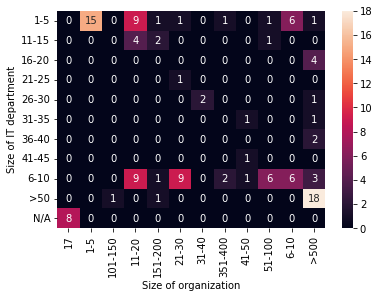

In [35]:
plt.figure()
sns.heatmap(pd.crosstab(df_categorical['Size of IT department'], df_categorical['Size of organization']), annot = True)

# Conclusion

## Columns that we will drop
1. Year of project
2. Estimated effort
3. Estimated duration
4. Required reusability
 

## Columns that we may drop

 
1. Dedicated team members
2. Programmers capability
3. Open source software
4. DBMS used
5. Size of organization

## Columns that we will treat
1. Size of organization
2. Customer organization type